# **Contents**
[Importing Libraries and Packages](#p2)  
[Loading and Viewing Data Set](#p3)  
[Split data between _Prospect versus _Existing Customer](#p4)  
[Create New Customer(prospect) Model](#p5)  
[Create Recency Variables by Propsect](done in etl_pipeline_sources.ipynb)
[Dealing with NaN Values (Imputation)](#p7)  
[Categorical Feature Engineering](#p8)  
[Numerical Feature Engineering](#p9)  
[Predicting Win Loss Models](#p10)  
[Evaluating Model Performances](#p11)  
[Creating Production Scripting](#p12)  
[**Placeholder for confusion matrix and feature weights for models**](#p13)
<a id="p1"></a>

#  **Importing Libraries and Packages**

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns

from matplotlib import pyplot as plt
import missingno as msno  #missing data
from dtreeviz.trees import *  #decision tree visualization
from IPython.display import Image, display_svg
sns.set_style("whitegrid")
%matplotlib inline

from dtreeviz.trees import *
from IPython.display import Image, display_svg

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

import os 
from sklearn.preprocessing import StandardScaler  
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")
#print(os.listdir("../input"))

#  **Loading and Viewing Data Set**
<a id="p3"></a>

In [2]:
# Print options
np.set_printoptions(precision=4, threshold=10000, linewidth=160, edgeitems=999, suppress=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 160)
pd.set_option('expand_frame_repr', False)
pd.set_option('precision', 4)
""" fix flow to 3 places"""
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
datadirectory = '/Users/user1/projects/datascience/notebooks/cvanalytics/pipeline_scoring/'

In [4]:
data = pd.read_pickle(datadirectory+'data_prospect')
data.head()

,wonopp,opp_id,accountid,opp_createddate,inflowdate__c,closedate,firstwindate,daysfromcreate,stagename,software_amount__c,hasmtnrenewal,acquisitiontype__c,lastupdate,lastforecastcategory,laststagename,relationshiptype_text__c,reportinglevel0__c,reportinglevel1__c,industry,numberofemployees,annualrevenue,start_date_at_commvault__c,is_firstwindate,no_firstwindate,cust_model,cum_prev_close,CumLostAmount,dayfrominflow,days_fr_hire
0,0,0061W00000ogdefQAA,0014000001qnEKNAA2,2017-09-26 23:06:18,2017-09-26,2017-10-31,NaT,35,Closed / Lost,"5,000.00",0,Perpetual,2017-10-05 21:27:15.0000000,Pipeline,Qualifying,Reseller-Candidate;Service Provider-Candidate,APAC,ASEAN,NaN,nan,nan,2016-09-26,0,1,1,0,nan,35.00,400.00
1,0,0061W00000ogfGLQAY,0011W00001r5WgMQAU,2017-09-27 07:33:19,2017-09-27,2018-03-28,NaT,182,Closed / Lost,"10,000.00",0,Perpetual,2017-09-27 09:44:03.0000000,Pipeline,Qualifying,End User - Prospect,EMEA,East Europe,Construction,750.00,"310,001,871.00",2017-07-04,0,1,1,0,nan,182.00,267.00
2,0,0061W00000ogdnrQAA,0014000000KHadSAAT,2017-09-27 00:02:32,2017-09-27,2018-04-13,NaT,198,Closed / Lost,"45,000.00",0,Perpetual,2017-09-27 13:27:21.0000000,Pipeline,Qualifying,End User - Prospect,Americas,US West & LATAM,Other,500.00,0.00,2016-10-03,0,1,1,0,nan,198.00,557.00
3,0,0061W00000oghAbQAI,0011W00001r5ZA7QAM,2017-09-27 11:42:10,2017-09-28,2018-02-23,NaT,149,Closed / Lost,"2,000.00",0,Perpetual,2018-01-07 15:23:21.0000000,Pipeline,Qualifying,End User - Prospect,EMEA,Territory,Media,373.00,"75,080,486.00",2015-07-01,0,1,1,0,nan,148.00,968.00
4,0,0061W00000oggFOQAY,0014000000dK375AAC,2017-09-27 10:15:56,2017-09-27,2017-10-16,NaT,19,Closed / Lost,"12,987.01",0,Subscription,2017-09-27 10:19:53.0000000,Pipeline,Qualifying,End User - Prospect,EMEA,Large National,Banking & Insurance,"46,000.00",0.00,2015-09-21,0,1,1,0,nan,19.00,756.00


In [5]:
print("Total size of all sample from etl_pipeline_sources.ipynb", data.shape)

Total size of all sample from etl_pipeline_sources.ipynb (40536, 29)


In [6]:
print(list(data.columns))

['wonopp', 'opp_id', 'accountid', 'opp_createddate', 'inflowdate__c', 'closedate', 'firstwindate', 'daysfromcreate', 'stagename', 'software_amount__c', 'hasmtnrenewal', 'acquisitiontype__c', 'lastupdate', 'lastforecastcategory', 'laststagename', 'relationshiptype_text__c', 'reportinglevel0__c', 'reportinglevel1__c', 'industry', 'numberofemployees', 'annualrevenue', 'start_date_at_commvault__c', 'is_firstwindate', 'no_firstwindate', 'cust_model', 'cum_prev_close', 'CumLostAmount', 'dayfrominflow', 'days_fr_hire']


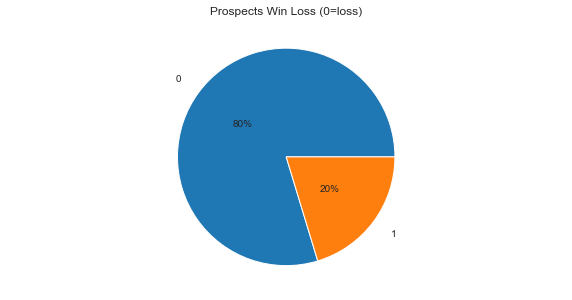

In [7]:
from matplotlib.pyplot import pie, axis, show
sums = data.wonopp.groupby(data.wonopp).count()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

axis('equal');
ax.pie(sums, labels=sums.index, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2, explode=None);
ax.set_title("Prospects Win Loss (0=loss)")

show()


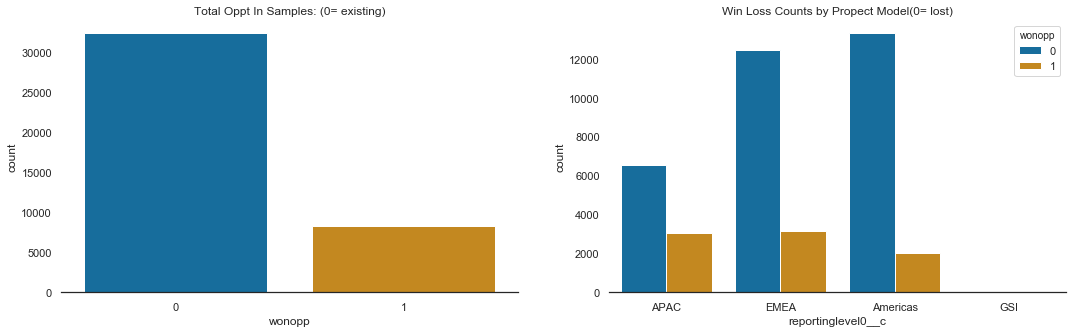

In [8]:
#Specify figure size
sns.set(style='white', palette='colorblind')
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=False)
sns.despine(left=True)

sns.countplot(x="wonopp", data=data, ax=axes[0])
axes[0].set_title('Total Oppt In Samples: (0= existing)')
sns.countplot(x="reportinglevel0__c", hue="wonopp", data=data, ax=axes[1])
axes[1].set_title('Win Loss Counts by Propect Model(0= lost)', fontsize=12);

In [9]:
# create new column with random numbered column 1 to 31,986.
number_in_sample = len(data)
sample_no = np.random.choice(number_in_sample, size=(1,number_in_sample), replace=False)+1
data['sample_num'] = sample_no[0]
print("min number sample num= ",
      data['sample_num'].min(),
     "\n max number in sample =",
     data['sample_num'].max())

min number sample num=  1 
 max number in sample = 40536


In [10]:
#size of training and test sample
highest_sample_no = int(data['sample_num'].max()*.66)
print("highest sample number", highest_sample_no)

highest sample number 26753


In [11]:
is_training =  data['sample_num']<= highest_sample_no
new_train = data[is_training].copy()
new_train.reindex()
print("Size Training Sample", new_train.shape)

Size Training Sample (26753, 30)


In [12]:
new_train.head()

,wonopp,opp_id,accountid,opp_createddate,inflowdate__c,closedate,firstwindate,daysfromcreate,stagename,software_amount__c,hasmtnrenewal,acquisitiontype__c,lastupdate,lastforecastcategory,laststagename,relationshiptype_text__c,reportinglevel0__c,reportinglevel1__c,industry,numberofemployees,annualrevenue,start_date_at_commvault__c,is_firstwindate,no_firstwindate,cust_model,cum_prev_close,CumLostAmount,dayfrominflow,days_fr_hire,sample_num
2,0,0061W00000ogdnrQAA,0014000000KHadSAAT,2017-09-27 00:02:32,2017-09-27,2018-04-13,NaT,198,Closed / Lost,"45,000.00",0,Perpetual,2017-09-27 13:27:21.0000000,Pipeline,Qualifying,End User - Prospect,Americas,US West & LATAM,Other,500.00,0.00,2016-10-03,0,1,1,0,nan,198.00,557.00,1994
3,0,0061W00000oghAbQAI,0011W00001r5ZA7QAM,2017-09-27 11:42:10,2017-09-28,2018-02-23,NaT,149,Closed / Lost,"2,000.00",0,Perpetual,2018-01-07 15:23:21.0000000,Pipeline,Qualifying,End User - Prospect,EMEA,Territory,Media,373.00,"75,080,486.00",2015-07-01,0,1,1,0,nan,148.00,968.00,23215
7,0,0061W00000ogebrQAA,0011W00001r5VwYQAU,2017-09-27 04:41:18,2017-11-29,2018-07-05,NaT,281,Closed / Lost,"5,000.00",0,Perpetual,2017-11-29 10:39:01.0000000,Pipeline,Positioning,End User - Prospect,EMEA,Territory,Consulting,0.00,0.00,2016-01-25,0,1,1,0,nan,218.00,892.00,5732
10,0,0061W00000ogb7lQAA,0014000001qaz8bAAA,2017-09-26 15:43:40,2017-09-26,2018-10-02,NaT,371,Closed / Lost,"179,648.82",0,Perpetual,2018-08-20 11:43:11.0000000,BestCase,Preference,End User - Prospect,Americas,US East,Healthcare,0.00,0.00,2018-06-14,0,1,1,0,nan,371.00,110.00,10159
11,1,0061W00000ogla6QAA,0014000001ZkztZAAR,2017-09-28 00:48:25,2017-09-28,2018-12-21,2018-12-21,449,Closed/Won,"20,754.25",0,Perpetual,2018-12-21 06:19:25.0000000,BestCase,Preference,End User - Customer,APAC,China,Manufacturing,"1,491.00",nan,2016-07-25,1,0,1,0,nan,449.00,879.00,10562


## create dataframe to hold training sample

In [13]:
new_train2 = new_train.copy()

# **Viewing Data and Dealing with NaN Values and 'zeros' (Imputation)**  

**veiw of missing data by record**
a line plot for each row's data completeness. 
right plot shows all rows have min - max valid values per row
[help](https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj)
<a id="p7"></a>

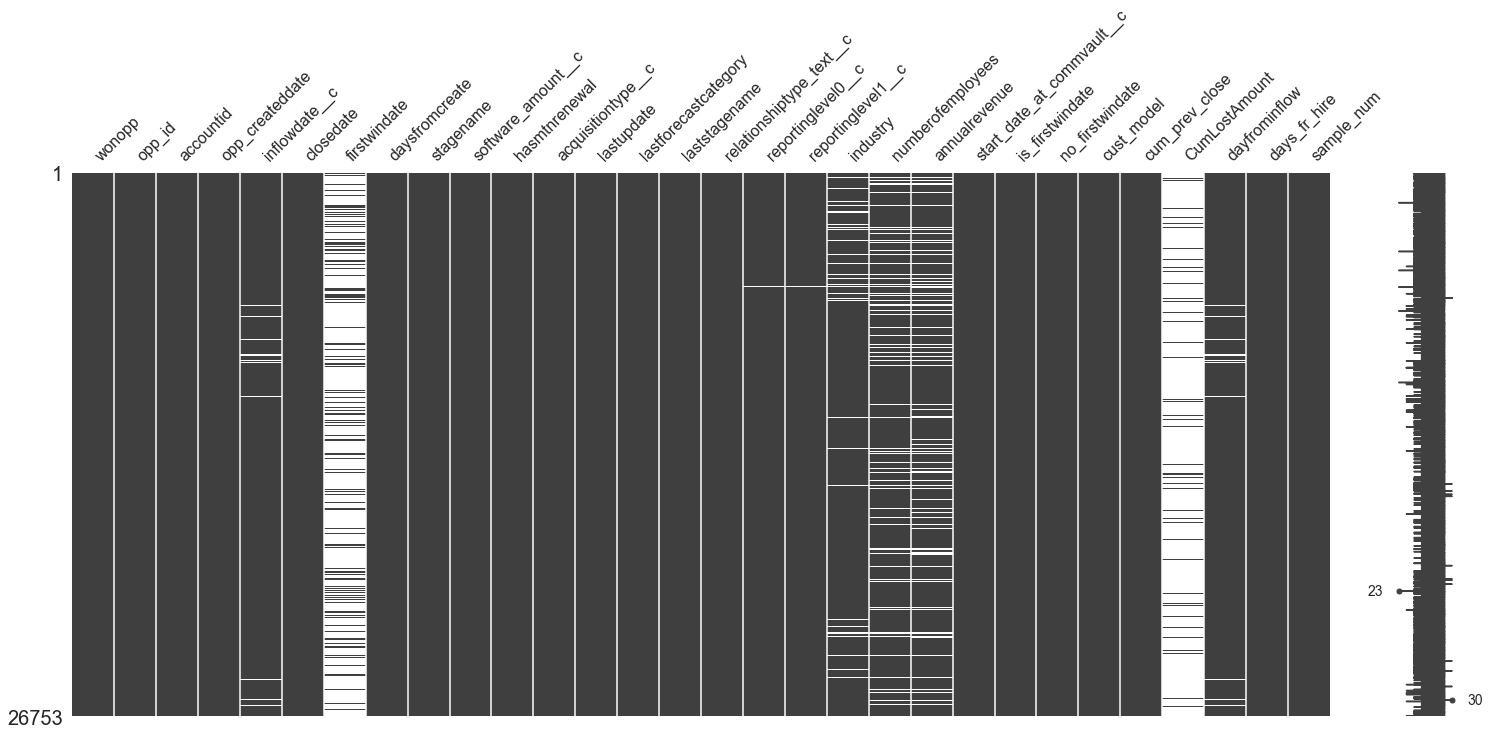

In [14]:
msno.matrix(new_train);

## View nan and zero values to be imputed

In [15]:
print("\nData Features Null\n")
na_totals = new_train.isnull().sum().sort_values(ascending=False)
na_totals_perc = new_train.isnull().sum().sort_values(ascending=False)/len(new_train)
print(na_totals[na_totals>0], "\n")
print(na_totals_perc[na_totals_perc>0])


Data Features Null

CumLostAmount               24203
firstwindate                21227
annualrevenue                3546
numberofemployees            2810
industry                     1177
dayfrominflow                 543
inflowdate__c                 543
reportinglevel1__c             21
relationshiptype_text__c        9
reportinglevel0__c              8
acquisitiontype__c              7
lastupdate                      5
lastforecastcategory            5
laststagename                   5
dtype: int64 

CumLostAmount              0.90
firstwindate               0.79
annualrevenue              0.13
numberofemployees          0.11
industry                   0.04
dayfrominflow              0.02
inflowdate__c              0.02
reportinglevel1__c         0.00
relationshiptype_text__c   0.00
reportinglevel0__c         0.00
acquisitiontype__c         0.00
lastupdate                 0.00
lastforecastcategory       0.00
laststagename              0.00
dtype: float64


## industry  
replace industry with mode and use as proxy for account demographics medians

In [16]:
industry_count = new_train.industry.value_counts().count()
print("number of unique industry_count", industry_count)
print("total missing values\n", new_train.industry.isnull().sum(),
      "\ntotal pcnt missing\n", new_train.industry.isnull().sum()/len(new_train))
print("total Zero values", 
     new_train['industry'].loc[new_train['industry']== 0].count())

number of unique industry_count 19
total missing values
 1177 
total pcnt missing
 0.04399506597390947
total Zero values 0


In [17]:
new_train['industry'] = new_train[['industry']].fillna(value='ind_missing')
#new_train.industry.replace([np.nan, 'ind_missing'], inplace=True) 

In [18]:
new_train['industry'].loc[new_train['industry']== 'ind_missing'].count()

1177

In [19]:
grouped = new_train.groupby(new_train['industry'])
grouped

In [20]:
grouped.count()

,wonopp,opp_id,accountid,opp_createddate,inflowdate__c,closedate,firstwindate,daysfromcreate,stagename,software_amount__c,hasmtnrenewal,acquisitiontype__c,lastupdate,lastforecastcategory,laststagename,relationshiptype_text__c,reportinglevel0__c,reportinglevel1__c,numberofemployees,annualrevenue,start_date_at_commvault__c,is_firstwindate,no_firstwindate,cust_model,cum_prev_close,CumLostAmount,dayfrominflow,days_fr_hire,sample_num
industry,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agriculture,147,147,147,147,145,147,28,147,147,147,147,147,147,147,147,147,147,147,131,130,147,147,147,147,147,9,145,147,147
Banking & Insurance,2676,2676,2676,2676,2612,2676,514,2676,2676,2676,2676,2675,2676,2676,2676,2676,2675,2675,2495,2443,2676,2676,2676,2676,2676,324,2612,2676,2676
Chemicals,668,668,668,668,655,668,143,668,668,668,668,668,668,668,668,668,668,668,639,628,668,668,668,668,668,65,655,668,668
Communications,680,680,680,680,659,680,160,680,680,680,680,680,680,680,680,680,680,680,653,630,680,680,680,680,680,107,659,680,680
Construction,1133,1133,1133,1133,1105,1133,213,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1094,1081,1133,1133,1133,1133,1133,92,1105,1133,1133
Consulting,1497,1497,1497,1497,1467,1497,286,1497,1497,1497,1497,1497,1497,1497,1497,1496,1497,1496,1467,1449,1497,1497,1497,1497,1497,116,1467,1497,1497
Education,1354,1354,1354,1354,1321,1354,217,1354,1354,1354,1354,1354,1354,1354,1354,1353,1354,1354,1251,1225,1354,1354,1354,1354,1354,129,1321,1354,1354
Government,2912,2912,2912,2912,2848,2912,699,2912,2912,2912,2912,2909,2912,2912,2912,2912,2911,2911,2482,2340,2912,2912,2912,2912,2912,272,2848,2912,2912
Healthcare,2675,2675,2675,2675,2627,2675,557,2675,2675,2675,2675,2675,2674,2674,2674,2675,2675,2675,2492,2435,2675,2675,2675,2675,2675,291,2627,2675,2675


### CumLostAmount

In [21]:
# check for zero values
print("min amount ", new_train.CumLostAmount.min())
print("total null values", new_train.CumLostAmount.isnull().sum())
print("total Zero values", 
     new_train['CumLostAmount'].loc[new_train['CumLostAmount']== 0].count())

min amount  1001.0
total null values 24203
total Zero values 0


In [22]:
#new_train['CumLostAmount'].fillna(0.00, inplace=True)
new_train[['CumLostAmount']] = new_train[['CumLostAmount']].fillna(value=0)

In [23]:
print("total null values", new_train.CumLostAmount.isnull().sum())

total null values 0


In [24]:
# convert 0 to small number to allow for charting log of all amounts
copy = new_train.copy()
copy.CumLostAmount = copy.CumLostAmount.replace({0.00: .01})

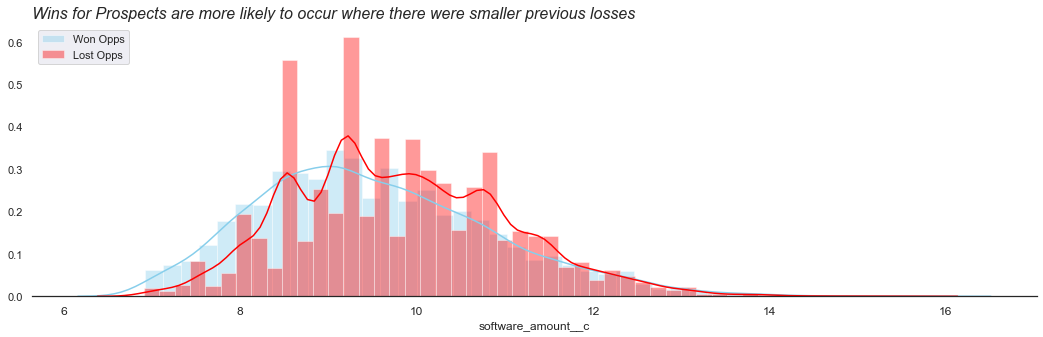

In [25]:
#'software_amount__c'
# Method 1: on the same Axis
sns.set(style='white', palette='colorblind')
fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=True)
sns.despine(left=True)
sns.set(style='dark')
#plt.title("WinLoss Distribution by log daysfromcreate, Wins are skewed smaller")
sns.distplot( np.log(copy[copy.wonopp == 1]["software_amount__c"]) , color="skyblue", label="Won Opps")
sns.distplot( np.log(copy[copy.wonopp == 0]["software_amount__c"]) , color="red", label="Lost Opps");
plt.legend(loc='upper left');
axes.set_title('Wins for Prospects are more likely to occur where there were smaller previous losses',
              fontsize=16,
              fontstyle='italic',
               loc='left')
plt.xticks(fontsize=12);

## numberofemployees  
replaced with emp_segment

In [26]:
# check for zero values
print("min amount ", new_train.numberofemployees.min())
print("total null values", new_train.numberofemployees.isnull().sum())
print("total Zero values", 
     new_train['numberofemployees'].loc[new_train['numberofemployees']== 0].count())

min amount  0.0
total null values 2810
total Zero values 2737


In [27]:
totalmissing = new_train.numberofemployees.loc[new_train.numberofemployees == 0].count() \
      + new_train.numberofemployees.isnull().sum()
perc_misssing = totalmissing/len(new_train)
print("total of missing and zero values for number of empployees ", \
      totalmissing, "\n percent missing employee count ", perc_misssing)

total of missing and zero values for number of empployees  5547 
 percent missing employee count  0.20734123275894292


In [28]:
# fill zero values with nan to create new categorical employees based on quartile and missing
new_train['numberofemployees'] = new_train['numberofemployees'].replace({0: np.nan})

In [29]:
 new_train['numberofemployees'].max()

5000000.0

In [30]:
## create labels from breakpoints
breaks=[1,101,1001, 5000, pd.np.inf]

#diff=np.diff(breaks).tolist()
diffbreaks=np.diff(breaks).tolist()

## make tuples of *breaks* and length of intervals
jointOrder = list(zip(breaks,diffbreaks))

## format label
segment = "{left:,.0f} to {right:,.0f}"
labels = [segment.format(left=yr[0], right=yr[0]+yr[1]-1) for yr in jointOrder]
labels

['1 to 100', '101 to 1,000', '1,001 to 4,999', '5,000 to inf']

In [31]:
new_train['emp_segment'] = pd.cut(new_train['numberofemployees'],breaks, labels=labels, right=False)

In [32]:
new_train['emp_segment'] = new_train['emp_segment'].replace({np.nan: 'emp_blank', '1 to 100': 'emp_SMB',
                                 '101 to 1,000': 'emp_MidMkt', '1,001 to 4,999': 'emp_Enter',
                                 '5,000 to inf': 'emp_LgEnter'})

In [33]:
result = new_train.groupby('emp_segment')['numberofemployees'].describe()
result

,count,mean,std,min,25%,50%,75%,max
emp_segment,,,,,,,,
emp_Enter,"4,238.00","2,391.73","1,072.73","1,001.00","1,500.00","2,090.50","3,000.00","4,999.00"
emp_LgEnter,"3,259.00","37,307.78","156,109.86","5,000.00","7,185.00","10,544.00","25,000.00","5,000,000.00"
emp_MidMkt,"8,750.00",440.42,265.09,101.00,200.00,380.00,600.00,"1,000.00"
emp_SMB,"4,959.00",40.54,33.95,1.00,10.00,31.00,69.00,100.00
emp_blank,0.00,nan,nan,nan,nan,nan,nan,nan


In [34]:
totalmissing = new_train.emp_segment.loc[new_train.emp_segment == 0].count() \
      + new_train.emp_segment.isnull().sum()
perc_misssing = totalmissing/len(new_train)
print("total of missing and zero values for emp_segment ", \
      totalmissing, "\n percent missing emp_segment count ", perc_misssing)

total of missing and zero values for emp_segment  0 
 percent missing emp_segment count  0.0


#### annualrevenue missing

In [35]:
# check for zero values
print("min amount ", new_train.annualrevenue.min())
print("total null values", new_train.annualrevenue.isnull().sum())
print("total Zero values", 
     new_train['annualrevenue'].loc[new_train['annualrevenue']== 0].count())

min amount  -67415276.0
total null values 3546
total Zero values 7739


In [36]:
totalmissing = new_train.annualrevenue.loc[new_train.annualrevenue == 0].count() \
      + new_train.annualrevenue.isnull().sum()
perc_misssing = totalmissing/len(new_train)
print("total of missing and zero values for annualrevenue ", \
      totalmissing, "\n percent missing annualrevenue ", perc_misssing)

total of missing and zero values for annualrevenue  11285 
 percent missing annualrevenue  0.42182185175494336


In [37]:
result = new_train.groupby('emp_segment')['annualrevenue'].describe()
result

,count,mean,std,min,25%,50%,75%,max
emp_segment,,,,,,,,
emp_Enter,"4,114.00","1,027,522,099.47","4,056,044,052.48",0.00,"1,140,000.00","230,788,830.00","721,652,684.25","96,340,914,432.00"
emp_LgEnter,"3,141.00","7,737,095,012.57","25,093,806,812.96",0.00,0.00,"1,046,999,999.00","4,700,000,000.00","485,651,000,000.00"
emp_MidMkt,"8,373.00","324,560,617.29","2,540,159,688.67","-67,415,276.00",0.00,"39,134,852.00","126,504,866.00","106,772,282,341.00"
emp_SMB,"4,829.00","103,022,256.95","1,181,591,608.77",0.00,0.00,"1,426,969.00","13,555,167.00","64,225,292,000.00"
emp_blank,"2,750.00","147,533,418.10","2,166,239,430.37",0.00,0.00,0.00,0.00,"57,963,200,000.00"


#### drop annualrevenue as 40+ are missing values

### days_fr_hire at commvault missing

In [38]:

totalmissing = new_train.days_fr_hire.loc[new_train.days_fr_hire == 0].count() \
      + new_train.days_fr_hire.isnull().sum()
perc_misssing = totalmissing/len(new_train)
print("total of missing and zero values for days_fr_hire ", \
      totalmissing, "\n percent missing days_fr_hire count ", perc_misssing)


total of missing and zero values for days_fr_hire  1 
 percent missing days_fr_hire count  3.7378985534332596e-05


In [39]:
copy = new_train.copy()
copy.dropna(inplace = True)

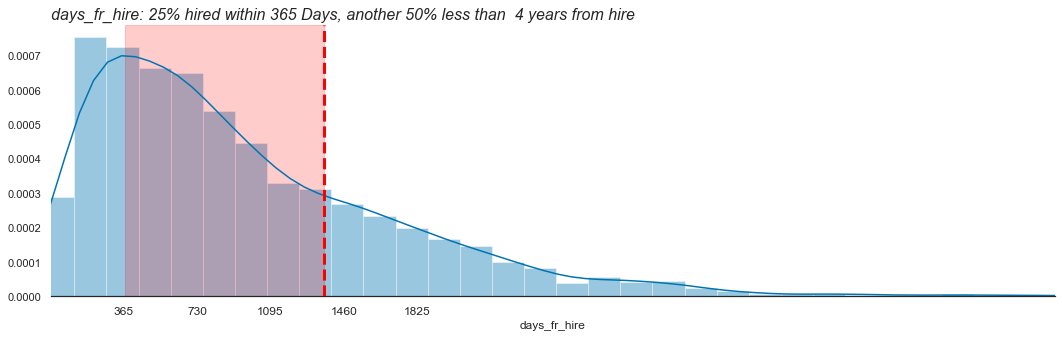

In [40]:
sns.set(style='white', palette='colorblind')
fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=True)
sns.despine(left=True)
sns.set(style='dark')
sns.distplot(copy["days_fr_hire"], kde=True)
#plt.axvline(copy["dayfrominflow"].quantile(.75), color='r', lw=5)
#Add shading and vertical line
plt.axvspan(copy["days_fr_hire"].quantile(q=.25), copy["days_fr_hire"].quantile(.75), alpha=0.2, color='red', zorder=1)
plt.axvline(copy["days_fr_hire"].quantile(.75), linestyle='--', linewidth=3, color='red', zorder=3)
axes.set_title('days_fr_hire: 25% hired within 365 Days, another 50% less than  4 years from hire',
              fontsize=16,
              fontstyle='italic',
               loc='left')
plt.xticks([365, 730, 1095, 1460, 1825], fontsize=12)
plt.xlim(0,5000);

### replace with most frequent category for those less than 20 missing   >reportinglevel1__c             23  
reportinglevel0__c               
reportinglevel1__c  
acquisitiontype__c                 
relationshiptype_text__c            
laststagename                      
lastforecastcategory            
lastupdate                        

In [41]:
totalmissing = new_train.reportinglevel0__c.loc[new_train.reportinglevel0__c == 0].count() \
      + new_train.reportinglevel0__c.isnull().sum()
perc_misssing = totalmissing/len(new_train)
print("total of missing and zero values for reportinglevel0__c ", \
      totalmissing, "\n percent missing reportinglevel0__c count ", perc_misssing)
print("total null values", new_train.reportinglevel0__c.isnull().sum())
print("total Zero values", 
     new_train['reportinglevel0__c'].loc[new_train['reportinglevel0__c']== 0].count())

total of missing and zero values for reportinglevel0__c  8 
 percent missing reportinglevel0__c count  0.00029903188427466077
total null values 8
total Zero values 0


In [42]:
new_train.reportinglevel0__c.fillna(new_train.reportinglevel0__c.mode().iloc[0],
                                   inplace = True)

In [43]:
totalmissing = new_train.reportinglevel1__c.loc[new_train.reportinglevel1__c == 0].count() \
      + new_train.reportinglevel1__c.isnull().sum()
perc_misssing = totalmissing/len(new_train)
print("total of missing and zero values for reportinglevel1__c ", \
      totalmissing, "\n percent missing reportinglevel1__c count ", perc_misssing)
print("total null values", new_train.reportinglevel1__c.isnull().sum())
print("total Zero values", 
     new_train['reportinglevel1__c'].loc[new_train['reportinglevel1__c']== 0].count())

total of missing and zero values for reportinglevel1__c  21 
 percent missing reportinglevel1__c count  0.0007849586962209846
total null values 21
total Zero values 0


In [44]:
new_train.reportinglevel1__c.fillna(new_train.reportinglevel1__c.mode().iloc[0],
                                   inplace = True)

In [45]:
totalmissing = new_train.acquisitiontype__c.loc[new_train.acquisitiontype__c == 0].count() \
      + new_train.acquisitiontype__c.isnull().sum()
perc_misssing = totalmissing/len(new_train)
print("total of missing and zero values for acquisitiontype__c ", \
      totalmissing, "\n percent missing acquisitiontype__c count ", perc_misssing)
print("total null values", new_train.acquisitiontype__c.isnull().sum())
print("total Zero values", 
     new_train['acquisitiontype__c'].loc[new_train['acquisitiontype__c']== 0].count())

total of missing and zero values for acquisitiontype__c  7 
 percent missing acquisitiontype__c count  0.00026165289874032817
total null values 7
total Zero values 0


In [46]:
new_train.acquisitiontype__c.fillna(new_train.acquisitiontype__c.mode().iloc[0],
                                   inplace = True)

In [47]:
totalmissing = new_train.relationshiptype_text__c.loc[new_train.relationshiptype_text__c == 0].count() \
      + new_train.relationshiptype_text__c.isnull().sum()
perc_misssing = totalmissing/len(new_train)
print("total of missing and zero values for relationshiptype_text__c ", \
      totalmissing, "\n percent missing relationshiptype_text__c count ", perc_misssing)
print("total null values", new_train.relationshiptype_text__c.isnull().sum())
print("total Zero values", 
     new_train['relationshiptype_text__c'].loc[new_train['relationshiptype_text__c']== 0].count())

total of missing and zero values for relationshiptype_text__c  9 
 percent missing relationshiptype_text__c count  0.00033641086980899337
total null values 9
total Zero values 0


In [48]:
new_train.relationshiptype_text__c.fillna(new_train.relationshiptype_text__c.mode().iloc[0],
                                   inplace = True)

In [49]:
totalmissing = new_train.lastforecastcategory.loc[new_train.lastforecastcategory == 0].count() \
      + new_train.lastforecastcategory.isnull().sum()
perc_misssing = totalmissing/len(new_train)
print("total of missing and zero values for lastforecastcategory ", \
      totalmissing, "\n percent missing lastforecastcategory count ", perc_misssing)
print("total null values", new_train.lastforecastcategory.isnull().sum())
print("total Zero values", 
     new_train['lastforecastcategory'].loc[new_train['lastforecastcategory']== 0].count())

total of missing and zero values for lastforecastcategory  5 
 percent missing lastforecastcategory count  0.000186894927671663
total null values 5
total Zero values 0


In [50]:
new_train.lastforecastcategory.fillna(new_train.lastforecastcategory.mode().iloc[0],
                                   inplace = True)

In [51]:
totalmissing = new_train.lastupdate.loc[new_train.lastupdate == 0].count() \
      + new_train.lastupdate.isnull().sum()
perc_misssing = totalmissing/len(new_train)
print("total of missing and zero values for lastupdate ", \
      totalmissing, "\n percent missing lastupdate count ", perc_misssing)
print("total null values", new_train.lastupdate.isnull().sum())
print("total Zero values", 
     new_train['lastupdate'].loc[new_train['lastupdate']== 0].count())

total of missing and zero values for lastupdate  5 
 percent missing lastupdate count  0.000186894927671663
total null values 5
total Zero values 0


In [52]:
new_train.lastupdate.fillna(new_train.lastupdate.mode().iloc[0],
                                   inplace = True)

### dayfrominflow

In [53]:
totalmissing = new_train.dayfrominflow.loc[new_train.dayfrominflow == 0].count() \
      + new_train.dayfrominflow.isnull().sum()
perc_misssing = totalmissing/len(new_train)
print("total of missing and zero values for dayfrominflow ", \
      totalmissing, "\n percent missing dayfrominflow count ", perc_misssing)
print("total null values", new_train.dayfrominflow.isnull().sum())
print("total Zero values", 
     new_train['dayfrominflow'].loc[new_train['dayfrominflow']== 0].count())

total of missing and zero values for dayfrominflow  1398 
 percent missing dayfrominflow count  0.052255821776996975
total null values 543
total Zero values 855


In [54]:
copy = new_train.copy()
copy.dropna(inplace = True)

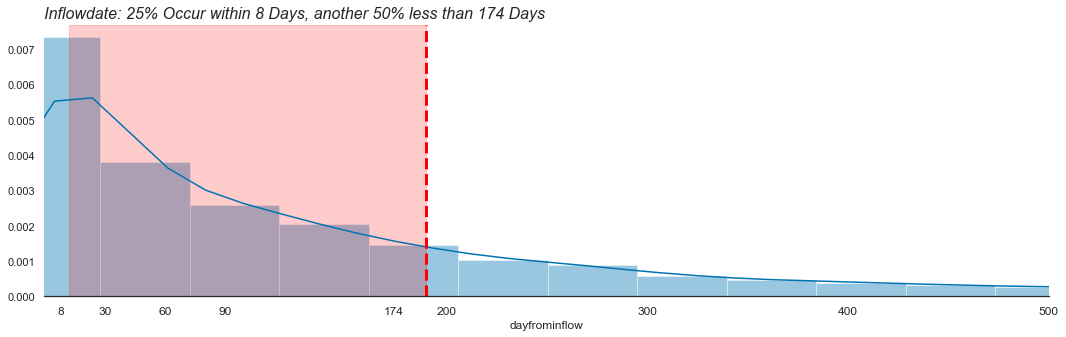

In [55]:
sns.set(style='white', palette='colorblind')
fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=True)
sns.despine(left=True)
sns.set(style='dark')
sns.distplot(copy["dayfrominflow"], kde=True)
#plt.axvline(copy["dayfrominflow"].quantile(.75), color='r', lw=5)
#Add shading and vertical line
plt.axvspan(copy["dayfrominflow"].quantile(q=.25), copy["dayfrominflow"].quantile(.75), alpha=0.2, color='red', zorder=1)
plt.axvline(copy["dayfrominflow"].quantile(.75), linestyle='--', linewidth=3, color='red', zorder=3)
axes.set_title('Inflowdate: 25% Occur within 8 Days, another 50% less than 174 Days',
              fontsize=16,
              fontstyle='italic',
               loc='left')
plt.xticks([8, 30, 60, 90, 174, 200, 300, 400, 500], fontsize=12)
plt.xlim(0,500);

In [56]:
# replace missing with median
new_train['dayfrominflow'].fillna(copy["dayfrominflow"].quantile(.50), inplace=True)

### laststagename

In [57]:
totalmissing = new_train.laststagename.loc[new_train.laststagename == 0].count() \
      + new_train.laststagename.isnull().sum()
perc_misssing = totalmissing/len(new_train)
print("total of missing and zero values for laststagename ", \
      totalmissing, "\n percent missing laststagename count ", perc_misssing)
print("total null values", new_train.laststagename.isnull().sum())
print("total Zero values", 
     new_train['laststagename'].loc[new_train['laststagename']== 0].count())

total of missing and zero values for laststagename  5 
 percent missing laststagename count  0.000186894927671663
total null values 5
total Zero values 0


In [58]:
new_train.laststagename.fillna(new_train.laststagename.mode().iloc[0],
                                   inplace = True)


Data Features Null

firstwindate         21227
numberofemployees     5547
annualrevenue         3546
inflowdate__c          543
dtype: int64 

firstwindate        0.79
numberofemployees   0.21
annualrevenue       0.13
inflowdate__c       0.02
dtype: float64


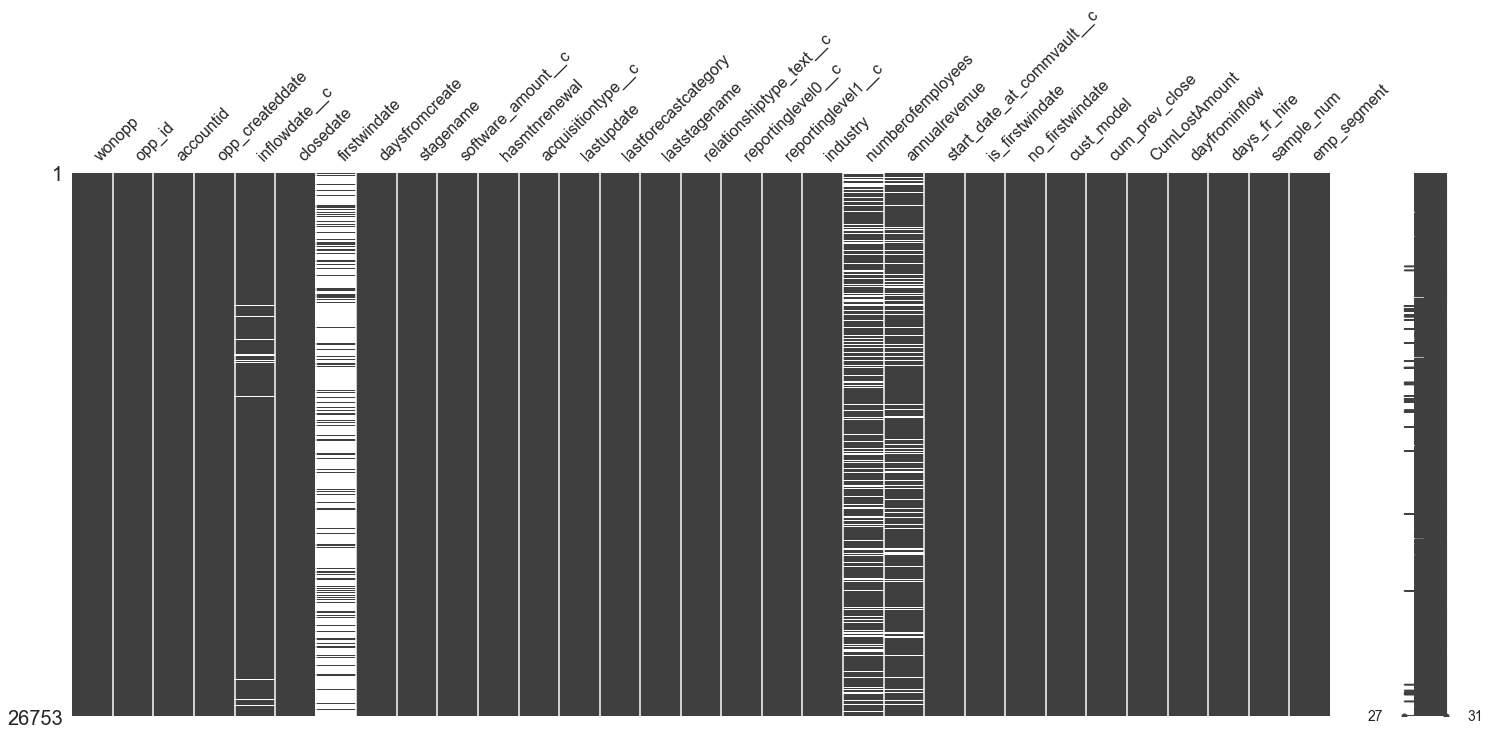

In [59]:
print("\nData Features Null\n")
na_totals = new_train.isnull().sum().sort_values(ascending=False)
na_totals_perc = new_train.isnull().sum().sort_values(ascending=False)/len(new_train)
print(na_totals[na_totals>0], "\n")
print(na_totals_perc[na_totals_perc>0])
msno.matrix(new_train);

### Confirm all NAs have been imputed or removed  
All missing data has been imputed besides date fields which are not needed for prediction.

In [60]:
print(list(new_train.columns))

['wonopp', 'opp_id', 'accountid', 'opp_createddate', 'inflowdate__c', 'closedate', 'firstwindate', 'daysfromcreate', 'stagename', 'software_amount__c', 'hasmtnrenewal', 'acquisitiontype__c', 'lastupdate', 'lastforecastcategory', 'laststagename', 'relationshiptype_text__c', 'reportinglevel0__c', 'reportinglevel1__c', 'industry', 'numberofemployees', 'annualrevenue', 'start_date_at_commvault__c', 'is_firstwindate', 'no_firstwindate', 'cust_model', 'cum_prev_close', 'CumLostAmount', 'dayfrominflow', 'days_fr_hire', 'sample_num', 'emp_segment']


In [61]:
new_train.sample(10)

,wonopp,opp_id,accountid,opp_createddate,inflowdate__c,closedate,firstwindate,daysfromcreate,stagename,software_amount__c,hasmtnrenewal,acquisitiontype__c,lastupdate,lastforecastcategory,laststagename,relationshiptype_text__c,reportinglevel0__c,reportinglevel1__c,industry,numberofemployees,annualrevenue,start_date_at_commvault__c,is_firstwindate,no_firstwindate,cust_model,cum_prev_close,CumLostAmount,dayfrominflow,days_fr_hire,sample_num,emp_segment
22042,0,0064000000iWPAkAAO,0014000001KadZQAAZ,2016-03-03 10:47:18,2016-03-03,2019-01-04,NaT,1037,Closed / Lost,"55,194.81",0,Subscription,2018-08-20 11:42:17.0000000,Pipeline,Intention,End User - Prospect,Americas,Public Sector,Education,"20,900.00","2,441,000,000.00",2004-03-29,0,1,1,1,"60,000.00","1,037.00","5,394.00",20157,emp_LgEnter
29812,0,0064000000lja7rAAA,0014000001kyvzsAAA,2016-12-21 02:11:12,2016-12-21,2017-06-06,NaT,167,Closed / Lost,"2,000.00",0,Perpetual,2017-01-19 04:46:30.0000000,Pipeline,Qualifying,End User - Prospect,APAC,China,Media,nan,nan,2016-08-01,0,1,1,0,0.00,167.00,309.00,23292,emp_blank
13325,0,0064000000fBG74AAG,0014000001bDUeZAAW,2015-05-11 18:27:46,2015-07-17,2015-07-17,NaT,67,Closed / Lost,"9,500.00",0,Perpetual,2015-07-17 16:28:18.0000000,Pipeline,Needs Analysis,End User - Prospect,Americas,US West & LATAM,Manufacturing,150.00,"30,000,000.00",2012-05-07,0,1,1,0,0.00,0.00,"1,166.00",22455,emp_MidMkt
9219,0,0061W000017yDqHQAU,0011W000022DQcbQAG,2019-02-11 22:19:47,2019-02-11,2019-02-13,NaT,2,Closed / Lost,"50,000.00",0,Perpetual,2019-02-11 22:19:47.0000000,Pipeline,Suspect,End User - Prospect,APAC,ANZ,ind_missing,nan,nan,2016-05-09,0,1,1,0,0.00,2.00,"1,010.00",6137,emp_blank
31690,0,0064000000mTXWbAAO,00140000012LrUAAA0,2017-05-08 13:48:13,2017-05-24,2017-07-10,NaT,63,Closed / Lost,"7,709.05",0,Perpetual,2017-07-07 23:14:37.0000000,Pipeline,Qualifying,End User - Prospect,Americas,Canada,Construction,160.00,"21,915,145.00",2016-04-11,0,1,1,4,"65,574.93",47.00,455.00,7685,emp_MidMkt
4037,0,0061W00000xMORTQA4,0011W00001uFG0XQAW,2018-03-08 00:40:02,2018-03-16,2018-06-20,NaT,104,Closed / Lost,"20,000.00",0,Perpetual,2018-04-10 21:30:43.0000000,Pipeline,Qualifying,End User - Prospect,APAC,China,Government,"5,191.00","739,698,772.00",2015-01-05,0,1,1,0,0.00,96.00,"1,262.00",8874,emp_LgEnter
39958,1,0064000000YO2n0AAD,0014000001EoMP8AAN,2014-08-18 05:37:41,2014-09-01,2015-09-30,2015-09-30,408,Closed/Won,"55,358.74",0,Perpetual,2015-09-28 09:12:43.0000000,BestCase,Selection,End User - Former Customer,EMEA,MESAT,Construction,500.00,0.00,2015-01-01,1,0,1,0,0.00,394.00,272.00,20938,emp_MidMkt
1047,0,0061W00000rhRtQQAU,0011W00001rhLt4QAE,2017-10-19 11:12:20,2017-10-19,2018-05-03,NaT,196,Closed / Lost,"1,999.00",0,Perpetual,2018-03-09 15:09:45.0000000,Pipeline,Qualifying,End User - Prospect,Americas,Public Sector,Education,1.00,"28,130.00",2017-09-18,0,1,1,0,0.00,196.00,227.00,12890,emp_SMB
22388,0,0064000000iYdN5AAK,0014000000FFMAyAAP,2016-03-23 10:51:02,2016-03-30,2016-03-30,NaT,7,Closed / Lost,"39,834.62",0,Perpetual,2016-03-30 09:59:24.0000000,Pipeline,Qualifying,Reseller-Contracted;Service Provider-Candidate,Americas,Channel,Technology,415.00,"440,000,000.00",2015-05-08,0,1,1,0,0.00,0.00,327.00,18718,emp_MidMkt
29076,0,0064000000li5t1AAA,0014000001k3XrRAAU,2016-11-29 10:26:11,2017-06-15,2017-07-23,NaT,236,Closed / Lost,"20,000.00",0,Perpetual,2017-06-15 05:40:58.0000000,Pipeline,Qualifying,End User - Prospect,EMEA,MESAT,Chemicals,700.00,"285,908,003.00",2016-01-15,0,1,1,0,0.00,38.00,555.00,11851,emp_MidMkt


## Remove columns such as identifiers and dates

In [62]:
columsToRemove = ['wonopp','opp_id', 'accountid', 'opp_createddate',
             'inflowdate__c', 'closedate', 'firstwindate', 'stagename',
             'lastupdate', 'start_date_at_commvault__c','cust_model', 'is_firstwindate',
              'no_firstwindate', 'sample_num', 'annualrevenue', 'lastforecastcategory',
                  'numberofemployees']

In [63]:
# move the winopp target column to be the first
print("""reorder columns so that target variable is in postion 0 for columns""")
data_columns = list(new_train.columns.values)
for column in columsToRemove:
    data_columns.remove(column)
new_col_list = list(['wonopp'])
new_col_list.extend(data_columns)
new_train = new_train.reindex(columns=new_col_list)
new_train.head()

reorder columns so that target variable is in postion 0 for columns


,wonopp,daysfromcreate,software_amount__c,hasmtnrenewal,acquisitiontype__c,laststagename,relationshiptype_text__c,reportinglevel0__c,reportinglevel1__c,industry,cum_prev_close,CumLostAmount,dayfrominflow,days_fr_hire,emp_segment
2,0,198,"45,000.00",0,Perpetual,Qualifying,End User - Prospect,Americas,US West & LATAM,Other,0,0.00,198.00,557.00,emp_MidMkt
3,0,149,"2,000.00",0,Perpetual,Qualifying,End User - Prospect,EMEA,Territory,Media,0,0.00,148.00,968.00,emp_MidMkt
7,0,281,"5,000.00",0,Perpetual,Positioning,End User - Prospect,EMEA,Territory,Consulting,0,0.00,218.00,892.00,emp_blank
10,0,371,"179,648.82",0,Perpetual,Preference,End User - Prospect,Americas,US East,Healthcare,0,0.00,371.00,110.00,emp_blank
11,1,449,"20,754.25",0,Perpetual,Preference,End User - Customer,APAC,China,Manufacturing,0,0.00,449.00,879.00,emp_Enter


## Feature Engineering

In [64]:
kinds = np.array([dt.kind for dt in new_train.dtypes])
kinds

array(['i', 'i', 'f', 'i', 'O', 'O', 'O', 'O', 'O', 'O', 'i', 'f', 'f', 'f', 'O'], dtype='<U1')

In [65]:
# feature frame to combine after transformed
feature_frames = []

#  **Numerical Feature Engineering**  
<a id="p9"></a>

In [66]:
all_columns = new_train.columns.values
is_num = kinds != 'O'
num_cols = all_columns[is_num]
print("Numerical features:\n",list(num_cols))

Numerical features:
 ['wonopp', 'daysfromcreate', 'software_amount__c', 'hasmtnrenewal', 'cum_prev_close', 'CumLostAmount', 'dayfrominflow', 'days_fr_hire']


In [67]:
#create dataframe for numerical variables
df_num_tranform = new_train[num_cols].copy()
df_num_tranform = df_num_tranform.reset_index(drop=True)
df_num_tranform.head()

,wonopp,daysfromcreate,software_amount__c,hasmtnrenewal,cum_prev_close,CumLostAmount,dayfrominflow,days_fr_hire
0,0,198,"45,000.00",0,0,0.00,198.00,557.00
1,0,149,"2,000.00",0,0,0.00,148.00,968.00
2,0,281,"5,000.00",0,0,0.00,218.00,892.00
3,0,371,"179,648.82",0,0,0.00,371.00,110.00
4,1,449,"20,754.25",0,0,0.00,449.00,879.00


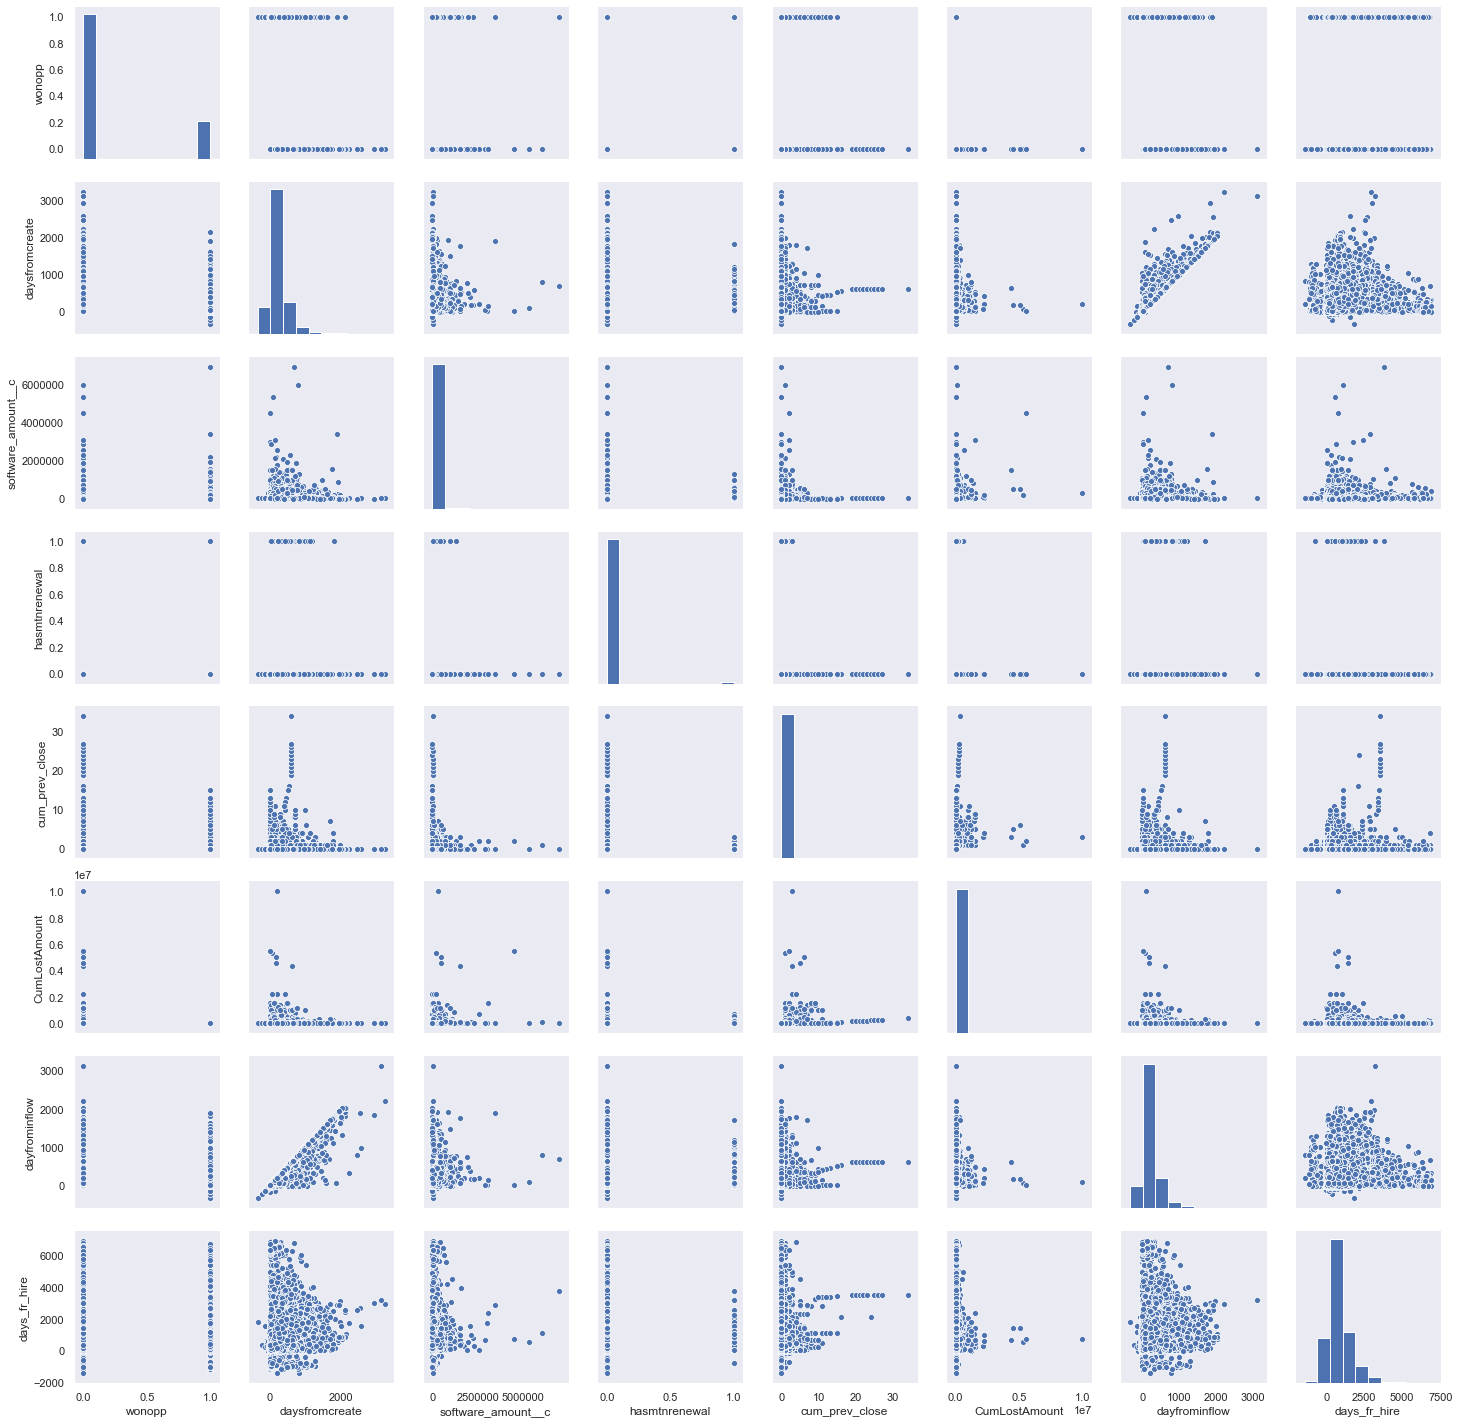

In [68]:
sns.pairplot(df_num_tranform)

In [69]:
for i in  df_num_tranform.columns:
    print(i)

wonopp
daysfromcreate
software_amount__c
hasmtnrenewal
cum_prev_close
CumLostAmount
dayfrominflow
days_fr_hire


#### daysfromcreate

In [70]:
totalmissing = new_train.daysfromcreate.loc[new_train.daysfromcreate == 0].count() \
      + new_train.daysfromcreate.isnull().sum()
perc_misssing = totalmissing/len(new_train)
print("total of missing and zero values for daysfromcreate ", \
      totalmissing, "\n percent missing daysfromcreate count ", perc_misssing)
print("total null values", new_train.daysfromcreate.isnull().sum())
print("total Zero values", 
     new_train['daysfromcreate'].loc[new_train['daysfromcreate']== 0].count())

total of missing and zero values for daysfromcreate  501 
 percent missing daysfromcreate count  0.01872687175270063
total null values 0
total Zero values 501


In [71]:
new_train.daysfromcreate.min()

-329

#### replace days from create <= 0 to 1

In [72]:
## replace days from create < 0 to 0
#df1['A'] = 
df_num_tranform.loc[df_num_tranform['daysfromcreate'] <= 0, 'daysfromcreate'] = 1

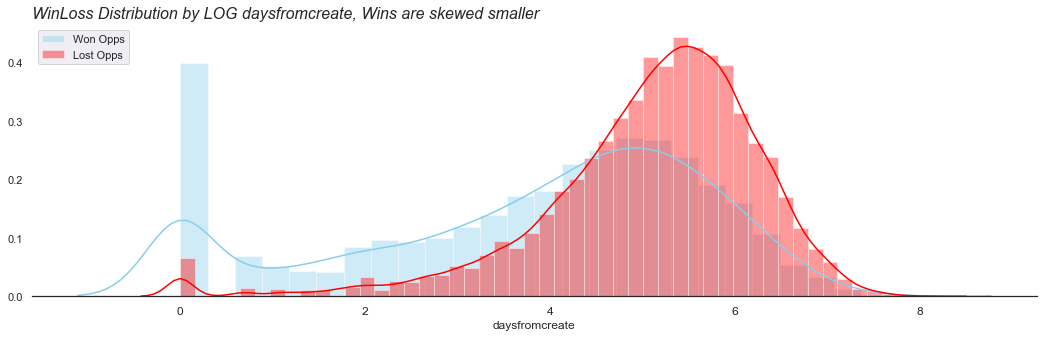

In [73]:
# Method 1: on the same Axis
sns.set(style='white', palette='colorblind')
fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=True)
sns.despine(left=True)
sns.set(style='dark')
#plt.title("WinLoss Distribution by log daysfromcreate, Wins are skewed smaller")
sns.distplot( np.log(df_num_tranform[df_num_tranform.wonopp == 1]["daysfromcreate"]) , color="skyblue", label="Won Opps")
sns.distplot( np.log(df_num_tranform[df_num_tranform.wonopp == 0]["daysfromcreate"]) , color="red", label="Lost Opps");
plt.legend(loc='upper left');
axes.set_title('WinLoss Distribution by LOG daysfromcreate, Wins are skewed smaller',
              fontsize=16,
              fontstyle='italic',
               loc='left')
plt.xticks(fontsize=12);

In [74]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(df_num_tranform["dayfrominflow"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)

df_dayfrominflow_transf = pd.DataFrame(data=feature_transf, 
                                         columns=['dayfrominflow_transf'])
feature_frames.append('df_dayfrominflow_transf')
df_dayfrominflow_transf.head()

,dayfrominflow_transf
0,-0.09
1,-0.30
2,-0.00
3,0.65
4,0.98


#### software_amount__c

In [75]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(df_num_tranform["software_amount__c"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)

df_software_amount_transf = pd.DataFrame(data=feature_transf, 
                                         columns=['software_amount_transf'])
feature_frames.append('df_software_amount_transf')
df_software_amount_transf.head()

,software_amount_transf
0,0.02
1,-0.33
2,-0.30
3,1.12
4,-0.17


#### cum_prev_close

In [76]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(df_num_tranform["cum_prev_close"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)

df_cum_prev_close_transf = pd.DataFrame(data=feature_transf, 
                                         columns=['cum_prev_close_transf'])
feature_frames.append('df_cum_prev_close_transf')
df_cum_prev_close_transf.head()

,cum_prev_close_transf
0,-0.22
1,-0.22
2,-0.22
3,-0.22
4,-0.22


#### CumLostAmount

In [77]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(df_num_tranform["CumLostAmount"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)

df_CumLostAmount_transf = pd.DataFrame(data=feature_transf, 
                                         columns=['CumLostAmount_transf'])
feature_frames.append('df_CumLostAmount_transf')
df_CumLostAmount_transf.head()

,CumLostAmount_transf
0,-0.09
1,-0.09
2,-0.09
3,-0.09
4,-0.09


#### dayfrominflow

In [78]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(df_num_tranform["dayfrominflow"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)

df_dayfrominflow_transf = pd.DataFrame(data=feature_transf, 
                                         columns=['dayfrominflow_transf'])
feature_frames.append('df_dayfrominflow_transf')
df_dayfrominflow_transf.head()

,dayfrominflow_transf
0,-0.09
1,-0.30
2,-0.00
3,0.65
4,0.98


#### days_fr_hire

In [79]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(df_num_tranform["days_fr_hire"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)

df_days_fr_hire_transf = pd.DataFrame(data=feature_transf, 
                                         columns=['days_fr_hire_transf'])
feature_frames.append('df_days_fr_hire_transf')
df_days_fr_hire_transf.head()

,days_fr_hire_transf
0,-0.40
1,0.08
2,-0.01
3,-0.93
4,-0.02


#  **Categorical Feature Engineering** 
<a id="p8"></a>

In [80]:
#add target at beginning of list
cat_cols = all_columns[~is_num]
cat_cols = list(cat_cols)
cat_cols.insert(0,"wonopp")
cat_cols = np.asarray(cat_cols)
print("categorical features:\n",list(cat_cols))

categorical features:
 ['wonopp', 'acquisitiontype__c', 'laststagename', 'relationshiptype_text__c', 'reportinglevel0__c', 'reportinglevel1__c', 'industry', 'emp_segment']


In [81]:
# create cat dataframe to use for transformations and encoding
df_cat_tranform = new_train[cat_cols].copy()
df_cat_tranform = df_cat_tranform.reset_index(drop=True)
df_cat_tranform.head()

,wonopp,acquisitiontype__c,laststagename,relationshiptype_text__c,reportinglevel0__c,reportinglevel1__c,industry,emp_segment
0,0,Perpetual,Qualifying,End User - Prospect,Americas,US West & LATAM,Other,emp_MidMkt
1,0,Perpetual,Qualifying,End User - Prospect,EMEA,Territory,Media,emp_MidMkt
2,0,Perpetual,Positioning,End User - Prospect,EMEA,Territory,Consulting,emp_blank
3,0,Perpetual,Preference,End User - Prospect,Americas,US East,Healthcare,emp_blank
4,1,Perpetual,Preference,End User - Customer,APAC,China,Manufacturing,emp_Enter


In [82]:
for i in  df_cat_tranform.columns:
    print(i)

wonopp
acquisitiontype__c
laststagename
relationshiptype_text__c
reportinglevel0__c
reportinglevel1__c
industry
emp_segment


### acquisitiontype__c

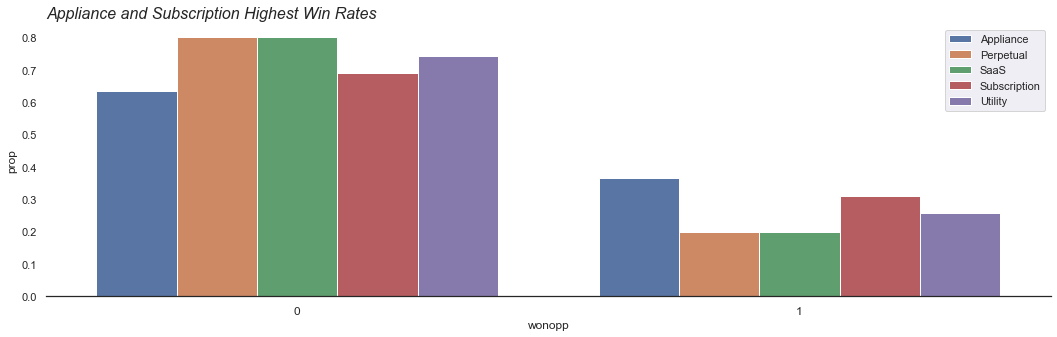

In [83]:
sns.set(style='white', palette='colorblind')
fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=True)
sns.despine(left=True)
sns.set(style='dark')
x, y, hue = "wonopp","prop", "acquisitiontype__c",
hue_order = [0, 1]
prop_df = (df_cat_tranform[x]
           .groupby(df_cat_tranform[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
#axes.set_title('Total Oppt In Samples: (0= existing)')
axes.set_title('Appliance and Subscription Highest Win Rates',
              fontsize=16,
              fontstyle='italic',
               loc='left')
sns.barplot(x=x, y=y, hue=hue, data=prop_df)
plt.legend(loc='upper right');
plt.xticks(fontsize=12);

In [84]:
means = df_cat_tranform['wonopp'].groupby([df_cat_tranform['acquisitiontype__c']]).mean()
means.sort_values(ascending = False)

acquisitiontype__c
Appliance      0.37
Subscription   0.31
Utility        0.26
SaaS           0.20
Perpetual      0.20
Name: wonopp, dtype: float64

In [85]:
acquisitiontype__c_count = df_cat_tranform.acquisitiontype__c.value_counts().count()
print("number of unique acquisitiontype__c_count", acquisitiontype__c_count)

number of unique acquisitiontype__c_count 5


In [86]:
totalmissing = df_cat_tranform.acquisitiontype__c.isnull().sum()
perc_misssing = totalmissing/len(df_cat_tranform)
print("total of missing for acquisitiontype__c ", \
      totalmissing, "\n percent missing acquisitiontype__c count ", perc_misssing)
print("total null values", df_cat_tranform.acquisitiontype__c.isnull().sum())

total of missing for acquisitiontype__c  0 
 percent missing acquisitiontype__c count  0.0
total null values 0


In [87]:
print(df_cat_tranform.acquisitiontype__c.value_counts())

Perpetual       25635
Subscription      813
Appliance         153
Utility           147
SaaS                5
Name: acquisitiontype__c, dtype: int64


In [88]:
ohe = OneHotEncoder(sparse=False)
acq_type__c_transf = np.array(df_cat_tranform[['acquisitiontype__c']]).reshape(-1, 1)

acq_type__c_transf = ohe.fit_transform(acq_type__c_transf)

df_acq_type__c_transf = pd.DataFrame(acq_type__c_transf,
             columns=list(ohe.get_feature_names()))
df_acq_type__c_transf.sample(5)

,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility
17628,0.00,1.00,0.00,0.00,0.00
26343,0.00,1.00,0.00,0.00,0.00
8428,0.00,1.00,0.00,0.00,0.00
20401,0.00,1.00,0.00,0.00,0.00
18041,0.00,0.00,0.00,0.00,1.00


In [89]:
#feature_frames = []
feature_frames.append('df_acq_type__c_transf')
print(feature_frames)

['df_dayfrominflow_transf', 'df_software_amount_transf', 'df_cum_prev_close_transf', 'df_CumLostAmount_transf', 'df_dayfrominflow_transf', 'df_days_fr_hire_transf', 'df_acq_type__c_transf']


### laststagename

In [90]:
acquisitiontype__c_count = df_cat_tranform.laststagename.value_counts().count()
print("number of unique laststagename", acquisitiontype__c_count)

number of unique laststagename 20


In [91]:
print("total missing values\n", df_cat_tranform.laststagename.isnull().sum(),
      "\ntotal pcnt missing\n", df_cat_tranform.laststagename.isnull().sum()/len(df_cat_tranform))

total missing values
 0 
total pcnt missing
 0.0


In [92]:
print(df_cat_tranform.laststagename.value_counts())

Qualifying                  11003
Selection                    5558
Needs Analysis               2435
Solution Mapping             1815
Motivation                   1647
Positioning                  1438
Decision                      848
Preference                    683
Sales Qualified Lead          570
Intention                     467
Qualification                  94
Sales Ready Lead               65
Due Diligence                  50
Sales Disqualified Lead        29
Suspect                        20
PO in Channel                  12
Marketing Qualified Lead        8
Procurement                     4
Sales Rejected Lead             4
Prospect                        3
Name: laststagename, dtype: int64


#### anything less than 100 go in 'other stage'

In [93]:
names = df_cat_tranform['laststagename'].value_counts()
names = list(pd.DataFrame(names).index)
print(names)

['Qualifying', 'Selection', 'Needs Analysis', 'Solution Mapping', 'Motivation', 'Positioning', 'Decision', 'Preference', 'Sales Qualified Lead', 'Intention', 'Qualification', 'Sales Ready Lead', 'Due Diligence', 'Sales Disqualified Lead', 'Suspect', 'PO in Channel', 'Marketing Qualified Lead', 'Procurement', 'Sales Rejected Lead', 'Prospect']


In [94]:
counts = df_cat_tranform['laststagename'].value_counts()
idx = counts[counts.lt(100)].index

In [95]:
idx

Index(['Qualification', 'Sales Ready Lead', 'Due Diligence', 'Sales Disqualified Lead', 'Suspect', 'PO in Channel', 'Marketing Qualified Lead', 'Procurement',
       'Sales Rejected Lead', 'Prospect'],
      dtype='object')

In [96]:
df_cat_tranform['laststagename_counts'] = df_cat_tranform['laststagename'].map(counts)
df_cat_tranform.loc[df_cat_tranform['laststagename_counts'].isin(idx), 'laststagename'] = 'stage_other'

In [97]:
s = df_cat_tranform.laststagename.value_counts()
df_cat_tranform.laststagename = np.where(df_cat_tranform.laststagename.isin(s.index[s < 100]), 'Other_stage', df_cat_tranform.laststagename)

In [98]:
df_cat_tranform.wonopp.sum()

5475

In [99]:
print(df_cat_tranform.laststagename.value_counts())

Qualifying              11003
Selection                5558
Needs Analysis           2435
Solution Mapping         1815
Motivation               1647
Positioning              1438
Decision                  848
Preference                683
Sales Qualified Lead      570
Intention                 467
Other_stage               289
Name: laststagename, dtype: int64


In [100]:
# sns.set(style='white', palette='colorblind')
# fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=True)
# sns.despine(left=True)
# sns.set(style='dark')
# x, y, hue = "wonopp","prop", "laststagename",
# hue_order = [0, 1]
# prop_df = (df_cat_tranform[x]
#            .groupby(df_cat_tranform[hue])
#            .value_counts(normalize=True)
#            .rename(y)
#            .reset_index())
# #axes.set_title('Total Oppt In Samples: (0= existing)')
# axes.set_title('Forecast then Best Case have Highest Win Rates',
#               fontsize=16,
#               fontstyle='italic',
#                loc='left')
# sns.barplot(x=x, y=y, hue=hue, data=prop_df)
# plt.legend(loc='upper left');
# plt.xticks(fontsize=12);

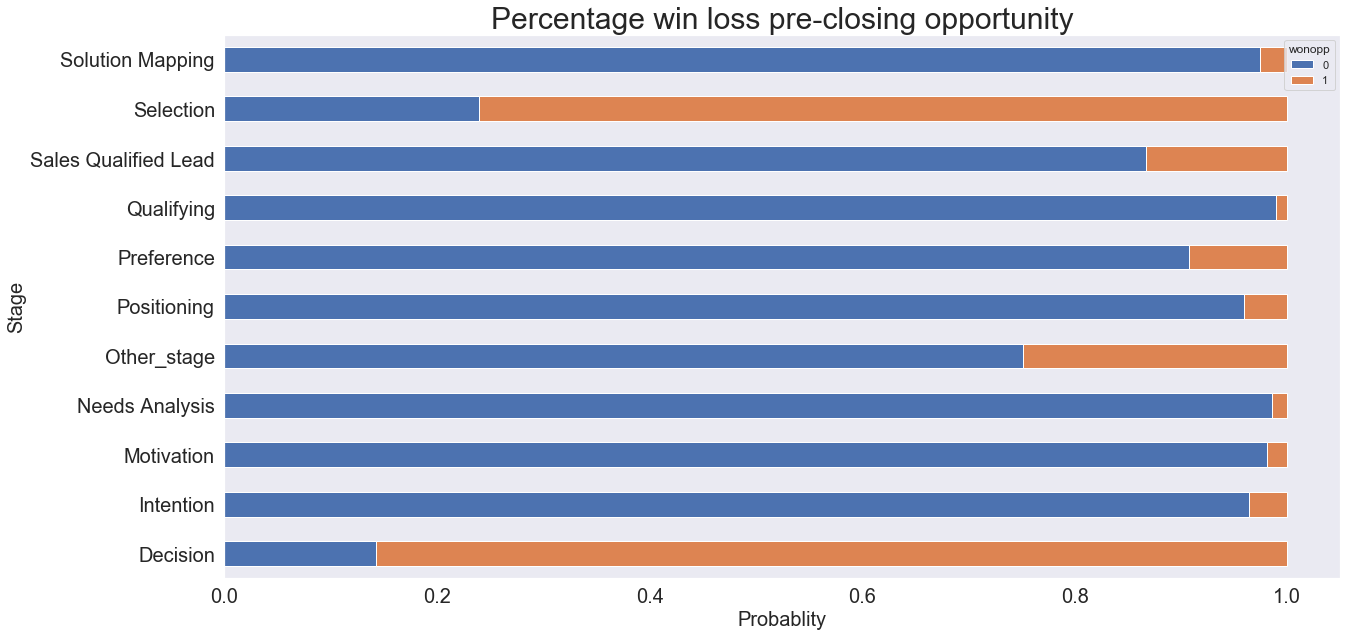

In [101]:
# gca stands for 'get current axis'

fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=False)
ax = plt.gca()
props = df_cat_tranform.groupby("laststagename")['wonopp'].value_counts(normalize=True).unstack()
props.plot(figsize = (20,10), fontsize=20,kind='barH', stacked='True', ax=ax)
# Add x and y lables, and set their font size
ax.set_title("Percentage win loss pre-closing opportunity",fontsize= 30)
plt.xlabel("Probablity", fontsize=20)
plt.ylabel("Stage", fontsize=20);

In [201]:
means = df_cat_tranform['wonopp'].groupby([df_cat_tranform['laststagename']]).mean()
count = df_cat_tranform['wonopp'].groupby([df_cat_tranform['laststagename']]).count()
print(means.sort_values(ascending = False), count.sort_values(ascending = False))

laststagename
Decision               0.86
Selection              0.76
Other_stage            0.25
Sales Qualified Lead   0.13
Preference             0.09
Positioning            0.04
Intention              0.04
Solution Mapping       0.03
Motivation             0.02
Needs Analysis         0.01
Qualifying             0.01
Name: wonopp, dtype: float64 laststagename
Qualifying              11003
Selection                5558
Needs Analysis           2435
Solution Mapping         1815
Motivation               1647
Positioning              1438
Decision                  848
Preference                683
Sales Qualified Lead      570
Intention                 467
Other_stage               289
Name: wonopp, dtype: int64


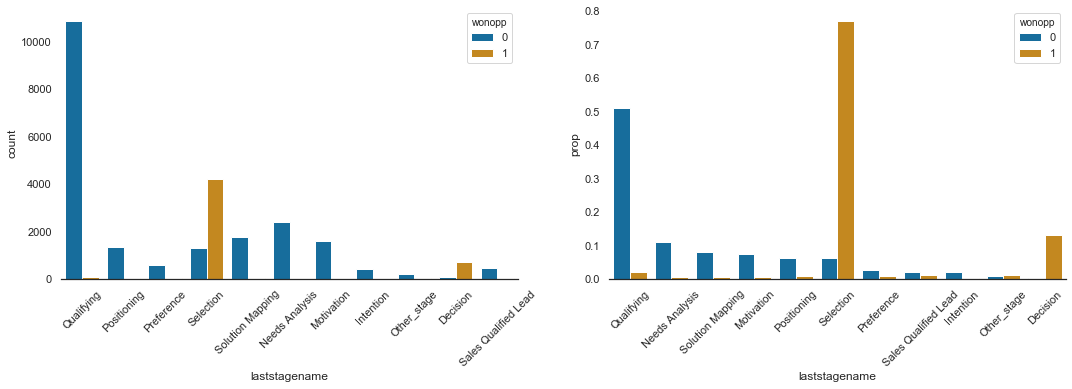

In [102]:
sns.set(style='white', palette='colorblind')
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=False)
sns.despine(left=True)
x, y, hue = "laststagename", "prop", "wonopp"
hue_order = [0, 1]

plt.xticks(rotation=45)
chart = sns.countplot(x=x, hue=hue, data=df_cat_tranform, ax=axes[0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
prop_df = (df_cat_tranform[x]
           .groupby(df_cat_tranform[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1]);

In [103]:
print("total missing values\n", df_cat_tranform.laststagename.isnull().sum(),
      "\ntotal pcnt missing\n", df_cat_tranform.laststagename.isnull().sum()/len(df_cat_tranform))

total missing values
 0 
total pcnt missing
 0.0


In [104]:
ohe = OneHotEncoder(sparse=False)
cat_transf = np.array(df_cat_tranform[['laststagename']]).reshape(-1, 1)

cat_transf = ohe.fit_transform(cat_transf)

df_laststagename_transf = pd.DataFrame(cat_transf,
             columns=list(ohe.get_feature_names()))
feature_frames.append('df_laststagename_transf')
df_laststagename_transf.sample(5)

,x0_Decision,x0_Intention,x0_Motivation,x0_Needs Analysis,x0_Other_stage,x0_Positioning,x0_Preference,x0_Qualifying,x0_Sales Qualified Lead,x0_Selection,x0_Solution Mapping
13407,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
5128,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11076,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2164,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
23120,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


### relationshiptype_text__c  
Feature removed as type is overfitting as type is determined post oppty.

In [105]:

data_count = df_cat_tranform.relationshiptype_text__c.value_counts().count()
print("number of unique relationshiptype_text__c\n", data_count)
print("total missing values\n", df_cat_tranform.relationshiptype_text__c.isnull().sum(),
      "\ntotal pcnt missing\n", df_cat_tranform.relationshiptype_text__c.isnull().sum()/len(df_cat_tranform))

number of unique relationshiptype_text__c
 51
total missing values
 0 
total pcnt missing
 0.0


In [106]:
# reduce classes to those with > 100 records
s = df_cat_tranform.relationshiptype_text__c.value_counts()
df_cat_tranform.relationshiptype_text__c = np.where(df_cat_tranform.relationshiptype_text__c.isin(s.index[s < 100]), 'Other_relationship', df_cat_tranform.relationshiptype_text__c)
df_cat_tranform.relationshiptype_text__c.value_counts()

End User - Prospect            19600
End User - Customer             3974
End User - Former Customer      1321
End User - Suspect              1061
Other_relationship               316
End User - Dormant Customer      308
Service Provider-Candidate       173
Name: relationshiptype_text__c, dtype: int64

In [107]:
ohe = OneHotEncoder(sparse=False)
cat_transf = np.array(df_cat_tranform[['relationshiptype_text__c']]).reshape(-1, 1)

cat_transf = ohe.fit_transform(cat_transf)

df_relationship_transf = pd.DataFrame(cat_transf,
             columns=list(ohe.get_feature_names()))
# feature_frames.append('df_relationship_transf')
df_relationship_transf.sample(5)

,x0_End User - Customer,x0_End User - Dormant Customer,x0_End User - Former Customer,x0_End User - Prospect,x0_End User - Suspect,x0_Other_relationship,x0_Service Provider-Candidate
13023,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3744,0.00,0.00,0.00,1.00,0.00,0.00,0.00
6847,0.00,0.00,0.00,1.00,0.00,0.00,0.00
21580,0.00,0.00,0.00,1.00,0.00,0.00,0.00
25912,0.00,0.00,0.00,1.00,0.00,0.00,0.00


### reportinglevel0__c

In [108]:
feature_frames

['df_dayfrominflow_transf',
 'df_software_amount_transf',
 'df_cum_prev_close_transf',
 'df_CumLostAmount_transf',
 'df_dayfrominflow_transf',
 'df_days_fr_hire_transf',
 'df_acq_type__c_transf',
 'df_laststagename_transf']

In [109]:
reportinglevel0__c_count = df_cat_tranform.reportinglevel0__c.value_counts().count()
print("number of unique reportinglevel0__c", reportinglevel0__c_count)
print("total missing values\n", df_cat_tranform.reportinglevel0__c.isnull().sum(),
      "\ntotal pcnt missing\n", df_cat_tranform.reportinglevel0__c.isnull().sum()/len(df_cat_tranform))

number of unique reportinglevel0__c 4
total missing values
 0 
total pcnt missing
 0.0


In [110]:
ohe = OneHotEncoder(sparse=False)
reporting0_transf = np.array(df_cat_tranform[['reportinglevel0__c']]).reshape(-1, 1)

reporting0_transf = ohe.fit_transform(reporting0_transf)

df_reporting0_transf = pd.DataFrame(reporting0_transf,
             columns=list(ohe.get_feature_names()))
feature_frames.append('df_reporting0_transf')
df_reporting0_transf.head()

,x0_APAC,x0_Americas,x0_EMEA,x0_GSI
0,0.00,1.00,0.00,0.00
1,0.00,0.00,1.00,0.00
2,0.00,0.00,1.00,0.00
3,0.00,1.00,0.00,0.00
4,1.00,0.00,0.00,0.00


### reportinglevel1__c

In [111]:
reportinglevel1__c_count = df_cat_tranform.reportinglevel1__c.value_counts().count()
print("number of unique reportinglevel0__c", reportinglevel1__c_count)
print("total missing values\n", df_cat_tranform.reportinglevel1__c.isnull().sum(),
      "\ntotal pcnt missing\n", df_cat_tranform.reportinglevel1__c.isnull().sum()/len(df_cat_tranform))

number of unique reportinglevel0__c 20
total missing values
 0 
total pcnt missing
 0.0


In [112]:
ohe = OneHotEncoder(sparse=False)
reporting1_transf = np.array(df_cat_tranform[['reportinglevel1__c']]).reshape(-1, 1)
reporting1_transf = ohe.fit_transform(reporting1_transf)

df_reporting1_transf = pd.DataFrame(reporting1_transf,
             columns=list(ohe.get_feature_names()))
feature_frames.append('df_reporting1_transf')
df_reporting1_transf.head()

,x0_ANZ,x0_ASEAN,x0_Canada,x0_Channel,x0_China,x0_East Europe,x0_Global Enterprise,x0_India,x0_Japan,x0_Korea,x0_Large National,x0_MESAT,x0_North-West Europe,x0_Public Sector,x0_SP,x0_South Europe,x0_Territory,x0_US East,x0_US West & LATAM,x0_Unallocated
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### industry

In [113]:
industry_count = df_cat_tranform.industry.value_counts().count()
print("number of unique industry_count", industry_count)
print("total missing values\n", df_cat_tranform.industry.isnull().sum(),
      "\ntotal pcnt missing\n", df_cat_tranform.industry.isnull().sum()/len(df_cat_tranform))

number of unique industry_count 20
total missing values
 0 
total pcnt missing
 0.0


In [114]:
industry_transf = np.array(df_cat_tranform[['industry']]).reshape(-1, 1)
industry_transf = ohe.fit_transform(industry_transf)
df_industry_transf = pd.DataFrame(industry_transf,
             columns=list(ohe.get_feature_names()))
df_industry_transf.head()

,x0_Agriculture,x0_Banking & Insurance,x0_Chemicals,x0_Communications,x0_Construction,x0_Consulting,x0_Education,x0_Government,x0_Healthcare,x0_Hospitality,x0_Legal,x0_Manufacturing,x0_Media,x0_Other,x0_Recreation,x0_Technology,x0_Transportation,x0_Utilities,x0_Wholesale & Retail,x0_ind_missing
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [115]:
feature_frames.append('df_industry_transf')

#### emp_segmen

In [116]:
emp_segment_count = df_cat_tranform.emp_segment.value_counts().count()
print("number of unique emp_segmen", emp_segment_count)
print("total missing values\n", df_cat_tranform.emp_segment.isnull().sum(),
      "\ntotal pcnt missing\n", df_cat_tranform.emp_segment.isnull().sum()/len(df_cat_tranform))

number of unique emp_segmen 5
total missing values
 0 
total pcnt missing
 0.0


In [117]:
ohe = OneHotEncoder(sparse=False)
cat_transf = np.array(df_cat_tranform[['emp_segment']]).reshape(-1, 1)

cat_transf = ohe.fit_transform(cat_transf)

df_emp_segment_transf = pd.DataFrame(cat_transf,
             columns=list(ohe.get_feature_names()))
feature_frames.append('df_emp_segment_transf')
df_emp_segment_transf.sample(5)

,x0_emp_Enter,x0_emp_LgEnter,x0_emp_MidMkt,x0_emp_SMB,x0_emp_blank
21118,0.00,1.00,0.00,0.00,0.00
4730,0.00,0.00,1.00,0.00,0.00
16492,0.00,0.00,0.00,1.00,0.00
12326,0.00,1.00,0.00,0.00,0.00
24938,0.00,0.00,1.00,0.00,0.00


In [118]:
print(feature_frames)

['df_dayfrominflow_transf', 'df_software_amount_transf', 'df_cum_prev_close_transf', 'df_CumLostAmount_transf', 'df_dayfrominflow_transf', 'df_days_fr_hire_transf', 'df_acq_type__c_transf', 'df_laststagename_transf', 'df_reporting0_transf', 'df_reporting1_transf', 'df_industry_transf', 'df_emp_segment_transf']


## Combine engineered numerical and categorical features

In [119]:
train_features_scaled = pd.concat([df_software_amount_transf, 
                                   df_cum_prev_close_transf, 
                                   df_CumLostAmount_transf, 
                                   df_dayfrominflow_transf, 
                                   df_days_fr_hire_transf, 
                                   df_acq_type__c_transf, 
                                   df_laststagename_transf, 
                                   # df_relationship_transf, 
                                   df_reporting0_transf, 
                                   df_reporting1_transf, 
                                   df_industry_transf, 
                                   df_emp_segment_transf],
                                  axis=1, join_axes=[df_dayfrominflow_transf.index])

In [120]:
print(train_features_scaled.shape)
train_features_scaled.sample(5)

(26753, 70)


,software_amount_transf,cum_prev_close_transf,CumLostAmount_transf,dayfrominflow_transf,days_fr_hire_transf,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility,x0_Decision,x0_Intention,x0_Motivation,x0_Needs Analysis,x0_Other_stage,x0_Positioning,x0_Preference,x0_Qualifying,x0_Sales Qualified Lead,x0_Selection,x0_Solution Mapping,x0_APAC,x0_Americas,x0_EMEA,x0_GSI,x0_ANZ,x0_ASEAN,x0_Canada,x0_Channel,x0_China,x0_East Europe,x0_Global Enterprise,x0_India,x0_Japan,x0_Korea,x0_Large National,x0_MESAT,x0_North-West Europe,x0_Public Sector,x0_SP,x0_South Europe,x0_Territory,x0_US East,x0_US West & LATAM,x0_Unallocated,x0_Agriculture,x0_Banking & Insurance,x0_Chemicals,x0_Communications,x0_Construction,x0_Consulting,x0_Education,x0_Government,x0_Healthcare,x0_Hospitality,x0_Legal,x0_Manufacturing,x0_Media,x0_Other,x0_Recreation,x0_Technology,x0_Transportation,x0_Utilities,x0_Wholesale & Retail,x0_ind_missing,x0_emp_Enter,x0_emp_LgEnter,x0_emp_MidMkt,x0_emp_SMB,x0_emp_blank
19007,-0.06,-0.22,-0.09,0.84,-0.03,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
393,-0.22,-0.22,-0.09,-0.16,1.41,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
15577,-0.25,-0.22,-0.09,-0.66,0.04,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
7106,-0.30,-0.22,-0.09,-0.63,-0.58,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
7644,-0.10,-0.22,-0.09,0.10,-0.26,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [121]:
X = train_features_scaled.copy()
y = new_train['wonopp'].values

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)
#X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, random_state=0, train_size=.67)

In [123]:
print("base rate", np.sum(y_train == 1) / len(y_train))

base rate 0.2039723276054452


In [124]:
X_train[:10]

,software_amount_transf,cum_prev_close_transf,CumLostAmount_transf,dayfrominflow_transf,days_fr_hire_transf,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility,x0_Decision,x0_Intention,x0_Motivation,x0_Needs Analysis,x0_Other_stage,x0_Positioning,x0_Preference,x0_Qualifying,x0_Sales Qualified Lead,x0_Selection,x0_Solution Mapping,x0_APAC,x0_Americas,x0_EMEA,x0_GSI,x0_ANZ,x0_ASEAN,x0_Canada,x0_Channel,x0_China,x0_East Europe,x0_Global Enterprise,x0_India,x0_Japan,x0_Korea,x0_Large National,x0_MESAT,x0_North-West Europe,x0_Public Sector,x0_SP,x0_South Europe,x0_Territory,x0_US East,x0_US West & LATAM,x0_Unallocated,x0_Agriculture,x0_Banking & Insurance,x0_Chemicals,x0_Communications,x0_Construction,x0_Consulting,x0_Education,x0_Government,x0_Healthcare,x0_Hospitality,x0_Legal,x0_Manufacturing,x0_Media,x0_Other,x0_Recreation,x0_Technology,x0_Transportation,x0_Utilities,x0_Wholesale & Retail,x0_ind_missing,x0_emp_Enter,x0_emp_LgEnter,x0_emp_MidMkt,x0_emp_SMB,x0_emp_blank
12608,-0.06,-0.22,-0.09,-0.09,-0.69,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2291,0.23,-0.22,-0.09,-0.01,-0.55,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
14005,-0.30,6.25,-0.09,-0.89,0.23,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
13954,-0.28,-0.22,-0.09,-0.06,-0.50,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
5459,0.06,-0.22,-0.09,-0.70,0.02,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
9265,-0.26,-0.22,-0.09,-0.88,-0.44,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
9022,-0.30,-0.22,-0.09,-0.61,-1.03,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2791,-0.25,-0.22,-0.09,0.13,-0.34,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
24852,-0.14,-0.22,-0.09,-0.84,-0.04,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0

In [125]:
y_train[:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [126]:
from collections import Counter
import shap
import eli5

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline
shap.initjs()

In [127]:
data2, labels = X, y
labels = np.array([int(label) for label in labels])
data2.shape, labels.shape

((26753, 70), (26753,))

In [128]:
Counter(labels)

Counter({0: 21278, 1: 5475})

# **Training the classification model**

We will now train and build a basic boosting classification model on our training data using the popular [XGBoost](https://xgboost.readthedocs.io/en/latest/) 
framework, an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable 

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data2, labels, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((18727, 70), (8026, 70))

In [130]:
X_train.head(3)

,software_amount_transf,cum_prev_close_transf,CumLostAmount_transf,dayfrominflow_transf,days_fr_hire_transf,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility,x0_Decision,x0_Intention,x0_Motivation,x0_Needs Analysis,x0_Other_stage,x0_Positioning,x0_Preference,x0_Qualifying,x0_Sales Qualified Lead,x0_Selection,x0_Solution Mapping,x0_APAC,x0_Americas,x0_EMEA,x0_GSI,x0_ANZ,x0_ASEAN,x0_Canada,x0_Channel,x0_China,x0_East Europe,x0_Global Enterprise,x0_India,x0_Japan,x0_Korea,x0_Large National,x0_MESAT,x0_North-West Europe,x0_Public Sector,x0_SP,x0_South Europe,x0_Territory,x0_US East,x0_US West & LATAM,x0_Unallocated,x0_Agriculture,x0_Banking & Insurance,x0_Chemicals,x0_Communications,x0_Construction,x0_Consulting,x0_Education,x0_Government,x0_Healthcare,x0_Hospitality,x0_Legal,x0_Manufacturing,x0_Media,x0_Other,x0_Recreation,x0_Technology,x0_Transportation,x0_Utilities,x0_Wholesale & Retail,x0_ind_missing,x0_emp_Enter,x0_emp_LgEnter,x0_emp_MidMkt,x0_emp_SMB,x0_emp_blank
19452,0.09,-0.22,-0.09,-0.65,0.25,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
19113,-0.29,-0.22,-0.09,-0.45,-0.54,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
20653,-0.01,-0.22,-0.09,0.65,-0.32,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


In [131]:
data_disp, labels_disp = X, y
X_train_disp, X_test_disp, y_train_disp, y_test_disp = train_test_split(data_disp, labels_disp, test_size=0.3, random_state=42)
X_train_disp.shape, X_test_disp.shape

((18727, 70), (8026, 70))

In [132]:
X_train_disp.head(3)

,software_amount_transf,cum_prev_close_transf,CumLostAmount_transf,dayfrominflow_transf,days_fr_hire_transf,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility,x0_Decision,x0_Intention,x0_Motivation,x0_Needs Analysis,x0_Other_stage,x0_Positioning,x0_Preference,x0_Qualifying,x0_Sales Qualified Lead,x0_Selection,x0_Solution Mapping,x0_APAC,x0_Americas,x0_EMEA,x0_GSI,x0_ANZ,x0_ASEAN,x0_Canada,x0_Channel,x0_China,x0_East Europe,x0_Global Enterprise,x0_India,x0_Japan,x0_Korea,x0_Large National,x0_MESAT,x0_North-West Europe,x0_Public Sector,x0_SP,x0_South Europe,x0_Territory,x0_US East,x0_US West & LATAM,x0_Unallocated,x0_Agriculture,x0_Banking & Insurance,x0_Chemicals,x0_Communications,x0_Construction,x0_Consulting,x0_Education,x0_Government,x0_Healthcare,x0_Hospitality,x0_Legal,x0_Manufacturing,x0_Media,x0_Other,x0_Recreation,x0_Technology,x0_Transportation,x0_Utilities,x0_Wholesale & Retail,x0_ind_missing,x0_emp_Enter,x0_emp_LgEnter,x0_emp_MidMkt,x0_emp_SMB,x0_emp_blank
19452,0.09,-0.22,-0.09,-0.65,0.25,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
19113,-0.29,-0.22,-0.09,-0.45,-0.54,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
20653,-0.01,-0.22,-0.09,0.65,-0.32,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


In [133]:
X_train_disp.shape

(18727, 70)

# **Using xboost as Default Model**

[Read the docs- XGBoost](https://xgboost.readthedocs.io/en/latest/tutorials/model.html)

In [134]:
%%time

import xgboost as xgb

xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc.fit(X_train, y_train)

CPU times: user 48.5 s, sys: 320 ms, total: 48.8 s
Wall time: 48.5 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Making predictions on the test data

Here we do the usual, use the trained model to make predictions on the test dataset

In [135]:
predictions = xgc.predict(X_test)
predictions[:10]

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

# **Model Performance Evaluation**

Time to put the model to the test! Let's evaluate how our model has performed with its predictions on the test data. 
We use my nifty `model_evaluation_utils` module for this which leverages `scikit-learn` internally to give us 
standard classification model evaluation metrics

In [136]:
import model_evaluation_utils as meu
class_labels = list(set(labels))
meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=predictions, classes=class_labels)

Model Performance metrics:
------------------------------
Accuracy: 0.9503
Precision: 0.9519
Recall: 0.9503
F1 Score: 0.9509

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6343
           1       0.86      0.91      0.89      1683

    accuracy                           0.95      8026
   macro avg       0.92      0.94      0.93      8026
weighted avg       0.95      0.95      0.95      8026


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       6088   255
        1        144  1539


In [137]:
list(X_test.columns)

['software_amount_transf',
 'cum_prev_close_transf',
 'CumLostAmount_transf',
 'dayfrominflow_transf',
 'days_fr_hire_transf',
 'x0_Appliance',
 'x0_Perpetual',
 'x0_SaaS',
 'x0_Subscription',
 'x0_Utility',
 'x0_Decision',
 'x0_Intention',
 'x0_Motivation',
 'x0_Needs Analysis',
 'x0_Other_stage',
 'x0_Positioning',
 'x0_Preference',
 'x0_Qualifying',
 'x0_Sales Qualified Lead',
 'x0_Selection',
 'x0_Solution Mapping',
 'x0_APAC',
 'x0_Americas',
 'x0_EMEA',
 'x0_GSI',
 'x0_ANZ',
 'x0_ASEAN',
 'x0_Canada',
 'x0_Channel',
 'x0_China',
 'x0_East Europe',
 'x0_Global Enterprise',
 'x0_India',
 'x0_Japan',
 'x0_Korea',
 'x0_Large National',
 'x0_MESAT',
 'x0_North-West Europe',
 'x0_Public Sector',
 'x0_SP',
 'x0_South Europe',
 'x0_Territory',
 'x0_US East',
 'x0_US West & LATAM',
 'x0_Unallocated',
 'x0_Agriculture',
 'x0_Banking & Insurance',
 'x0_Chemicals',
 'x0_Communications',
 'x0_Construction',
 'x0_Consulting',
 'x0_Education',
 'x0_Government',
 'x0_Healthcare',
 'x0_Hospitality',
 'x0_Legal',
 'x0_Manufacturing',
 'x0_Media',
 'x0_Other',
 'x0_Recreation',
 'x0_Technology',
 'x0_Transportation',
 'x0_Utilities',
 'x0_Wholesale & Retail',
 'x0_ind_missing',
 'x0_emp_Enter',
 'x0_emp_LgEnter',
 'x0_emp_MidMkt',
 'x0_emp_SMB',
 'x0_emp_blank']

## **Viewing Feature Importance**

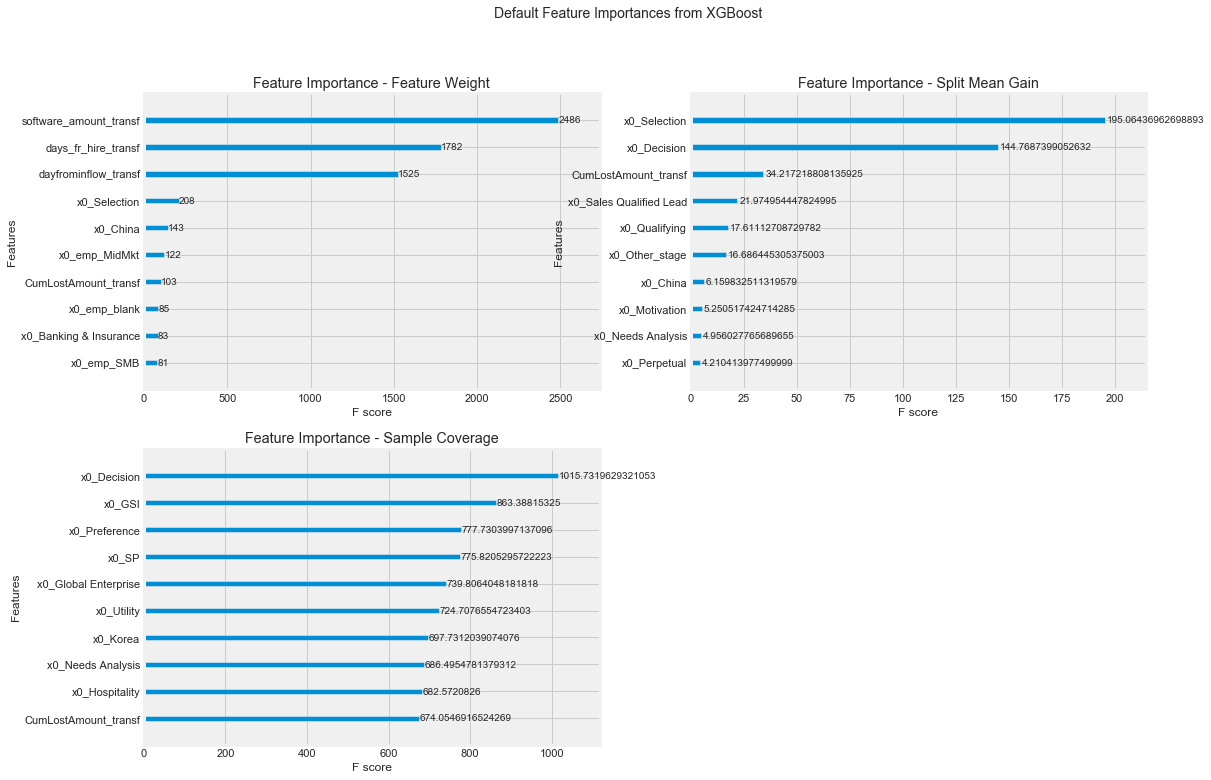

In [138]:
fig = plt.figure(figsize = (16, 12))
title = fig.suptitle("Default Feature Importances from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2,2, 1)
xgb.plot_importance(xgc, importance_type='weight', ax=ax1, max_num_features=10)
t=ax1.set_title("Feature Importance - Feature Weight")

ax2 = fig.add_subplot(2,2, 2)
xgb.plot_importance(xgc, importance_type='gain', ax=ax2, max_num_features=10)
t=ax2.set_title("Feature Importance - Split Mean Gain")

ax3 = fig.add_subplot(2,2, 3)
xgb.plot_importance(xgc, importance_type='cover', ax=ax3, max_num_features=10)
t=ax3.set_title("Feature Importance - Sample Coverage")

In [139]:
eli5.show_weights(xgc.get_booster())

Weight,Feature
0.3472,x0_Selection
0.2577,x0_Decision
0.0609,CumLostAmount_transf
0.0391,x0_Sales Qualified Lead
0.0313,x0_Qualifying
0.0297,x0_Other_stage
0.0110,x0_China
0.0093,x0_Motivation
0.0088,x0_Needs Analysis
0.0075,x0_Perpetual


In [140]:
doc_num = 0
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
eli5.show_prediction(xgc.get_booster(), X_test.iloc[doc_num], 
                     feature_names=list(data2.columns) ,show_feature_values=True)

Actual Label: 1
Predicted Label: 1


In [141]:
doc_num = 2
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
eli5.show_prediction(xgc.get_booster(), X_test.iloc[doc_num], feature_names=list(data2.columns) ,show_feature_values=True)

Actual Label: 0
Predicted Label: 0


## Feature Importances with Skater

Feature importance is generic term for the degree to which a predictive model relies on a particular feature. The skater feature importance implementation is based on an information theoretic criteria, measuring the entropy in the change of predictions, given a perturbation of a given feature. The intuition is that the more a model's decision criteria depend on a feature, the more we'll see predictions change as a function of perturbing a feature. The default method used is `prediction-variance` which is the mean absolute value of changes in predictions, given perturbations in the data.

In [142]:
# from skater.core.explanations import Interpretation
# from skater.model import InMemoryModel

In [143]:
# interpreter = Interpretation(training_data=X_test, training_labels=y_test, feature_names=list(data2.columns))
# im_model = InMemoryModel(xgc.predict_proba, examples=X_train, target_names=['Deal Won', 'Deal Lost'])

In [144]:
# plots = interpreter.feature_importance.plot_feature_importance(im_model, ascending=True, n_samples=5000)

# **Comparing xboost with other prediction models**  

In [145]:
from sklearn.model_selection import train_test_split #to create validation data set

In [146]:
from sklearn.metrics import f1_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {'gb':GradientBoostingClassifier(), 
          'mlp':MLPClassifier(), 
          'knn':KNeighborsClassifier(), 
          'reg':LogisticRegression()}

for model_key in models:
    model = models[model_key]
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds)
    print("F1 for {0}: {1}".format(model_key, f1))

F1 for gb: 0.8731049971925885
F1 for mlp: 0.840321141837645
F1 for knn: 0.8014549863595029
F1 for reg: 0.8484500574052812


In [147]:
print("xboost performance")
meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=predictions, classes=class_labels)

xboost performance
Model Performance metrics:
------------------------------
Accuracy: 0.9503
Precision: 0.9519
Recall: 0.9503
F1 Score: 0.9509

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6343
           1       0.86      0.91      0.89      1683

    accuracy                           0.95      8026
   macro avg       0.92      0.94      0.93      8026
weighted avg       0.95      0.95      0.95      8026


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       6088   255
        1        144  1539


In [148]:

logreg_clf = LogisticRegression()

parameters_logreg = {"penalty": ["l2"], "fit_intercept": [True, False], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                     "max_iter": [50, 100, 200], "warm_start": [True, False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_train, y_train)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_train, y_train)
pred_logreg = logreg_clf.predict(X_test)
acc_logreg = accuracy_score(y_test, pred_logreg)
F1_logreg = f1_score(y_test, pred_logreg)

In [149]:
F1_logreg

0.8484500574052812

In [150]:
rf_clf = RandomForestClassifier()

parameters_rf = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], "criterion": ["gini", "entropy"], "max_features": ["auto", "sqrt", "log2"], 
                 "max_depth": [2, 3, 5, 10], "min_samples_split": [2, 3, 5, 10]}

grid_rf = GridSearchCV(rf_clf, parameters_rf, scoring=make_scorer(accuracy_score))
grid_rf.fit(X_train, y_train)

rf_clf = grid_rf.best_estimator_

rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
F1_rf = f1_score(y_test, pred_logreg)

In [151]:
F1_rf

0.8484500574052812

# Testing Holdout

In [152]:
is_hold_out=  data['sample_num']> highest_sample_no
new_holdout = data[is_training].copy()
new_holdout.reindex()
print("Size new_holdout", new_holdout.shape)

Size new_holdout (26753, 30)


In [153]:
new_holdout.head()

,wonopp,opp_id,accountid,opp_createddate,inflowdate__c,closedate,firstwindate,daysfromcreate,stagename,software_amount__c,hasmtnrenewal,acquisitiontype__c,lastupdate,lastforecastcategory,laststagename,relationshiptype_text__c,reportinglevel0__c,reportinglevel1__c,industry,numberofemployees,annualrevenue,start_date_at_commvault__c,is_firstwindate,no_firstwindate,cust_model,cum_prev_close,CumLostAmount,dayfrominflow,days_fr_hire,sample_num
2,0,0061W00000ogdnrQAA,0014000000KHadSAAT,2017-09-27 00:02:32,2017-09-27,2018-04-13,NaT,198,Closed / Lost,"45,000.00",0,Perpetual,2017-09-27 13:27:21.0000000,Pipeline,Qualifying,End User - Prospect,Americas,US West & LATAM,Other,500.00,0.00,2016-10-03,0,1,1,0,nan,198.00,557.00,1994
3,0,0061W00000oghAbQAI,0011W00001r5ZA7QAM,2017-09-27 11:42:10,2017-09-28,2018-02-23,NaT,149,Closed / Lost,"2,000.00",0,Perpetual,2018-01-07 15:23:21.0000000,Pipeline,Qualifying,End User - Prospect,EMEA,Territory,Media,373.00,"75,080,486.00",2015-07-01,0,1,1,0,nan,148.00,968.00,23215
7,0,0061W00000ogebrQAA,0011W00001r5VwYQAU,2017-09-27 04:41:18,2017-11-29,2018-07-05,NaT,281,Closed / Lost,"5,000.00",0,Perpetual,2017-11-29 10:39:01.0000000,Pipeline,Positioning,End User - Prospect,EMEA,Territory,Consulting,0.00,0.00,2016-01-25,0,1,1,0,nan,218.00,892.00,5732
10,0,0061W00000ogb7lQAA,0014000001qaz8bAAA,2017-09-26 15:43:40,2017-09-26,2018-10-02,NaT,371,Closed / Lost,"179,648.82",0,Perpetual,2018-08-20 11:43:11.0000000,BestCase,Preference,End User - Prospect,Americas,US East,Healthcare,0.00,0.00,2018-06-14,0,1,1,0,nan,371.00,110.00,10159
11,1,0061W00000ogla6QAA,0014000001ZkztZAAR,2017-09-28 00:48:25,2017-09-28,2018-12-21,2018-12-21,449,Closed/Won,"20,754.25",0,Perpetual,2018-12-21 06:19:25.0000000,BestCase,Preference,End User - Customer,APAC,China,Manufacturing,"1,491.00",nan,2016-07-25,1,0,1,0,nan,449.00,879.00,10562


In [154]:
cols_needed = ['wonopp','software_amount__c', 'cum_prev_close', 'CumLostAmount', 'dayfrominflow', 
               'days_fr_hire', 'acquisitiontype__c','laststagename', 'reportinglevel0__c', 
               'reportinglevel1__c', 'industry', 'numberofemployees']

In [155]:
#create dataframe for holdout
holdout_data = new_holdout[cols_needed].copy()
holdout_data = holdout_data.reset_index(drop=True)
holdout_data.head()

,wonopp,software_amount__c,cum_prev_close,CumLostAmount,dayfrominflow,days_fr_hire,acquisitiontype__c,laststagename,reportinglevel0__c,reportinglevel1__c,industry,numberofemployees
0,0,"45,000.00",0,nan,198.00,557.00,Perpetual,Qualifying,Americas,US West & LATAM,Other,500.00
1,0,"2,000.00",0,nan,148.00,968.00,Perpetual,Qualifying,EMEA,Territory,Media,373.00
2,0,"5,000.00",0,nan,218.00,892.00,Perpetual,Positioning,EMEA,Territory,Consulting,0.00
3,0,"179,648.82",0,nan,371.00,110.00,Perpetual,Preference,Americas,US East,Healthcare,0.00
4,1,"20,754.25",0,nan,449.00,879.00,Perpetual,Preference,APAC,China,Manufacturing,"1,491.00"


In [156]:
#missing data categorical
total_cat = holdout_data.select_dtypes(exclude=[np.number]).isnull().sum().sort_values(ascending=False)
percent_cat = (holdout_data.select_dtypes(exclude=[np.number]).isnull().sum()/holdout_data.select_dtypes(exclude=[np.number]).isnull().count()).sort_values(ascending=False)
missing_data_cat = pd.concat([total_cat, percent_cat], axis=1, keys=['Total', 'Percent'])
missing_data_cat.head(20)

,Total,Percent
industry,1177,0.04
reportinglevel1__c,21,0.00
reportinglevel0__c,8,0.00
acquisitiontype__c,7,0.00
laststagename,5,0.00


In [157]:
#missing data numerical
total_num = holdout_data.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)
percent_num = (holdout_data.select_dtypes(include=[np.number]).isnull().sum()/holdout_data.select_dtypes(include=[np.number]).isnull().count()).sort_values(ascending=False)
missing_data_num = pd.concat([total_num, percent_num], axis=1, keys=['Total', 'Percent'])
missing_data_num.head(10)

,Total,Percent
CumLostAmount,24203,0.90
numberofemployees,2810,0.11
dayfrominflow,543,0.02
days_fr_hire,0,0.00
cum_prev_close,0,0.00
software_amount__c,0,0.00
wonopp,0,0.00


# **Apply Transformations to Holdout Data**

In [158]:
holdout_data["software_amount__c"][:10]

0    45,000.00
1     2,000.00
2     5,000.00
3   179,648.82
4    20,754.25
5    10,000.00
6    48,466.75
7    30,000.00
8    20,000.00
9     7,680.00
Name: software_amount__c, dtype: float64

In [159]:
scaler = StandardScaler()
holdout_data["software_amount__c"] = np.array(holdout_data["software_amount__c"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)
holdout_data["software_amount_transf"] = feature_transf
del holdout_data["software_amount__c"]

In [160]:
holdout_data[['cum_prev_close']] = holdout_data[['cum_prev_close']].fillna(value=0)

In [161]:
holdout_data["cum_prev_close"] = np.array(holdout_data["cum_prev_close"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)
holdout_data["cum_prev_close_transf"] = feature_transf
del holdout_data["cum_prev_close"]

In [162]:
holdout_data[['CumLostAmount']] = holdout_data[['CumLostAmount']].fillna(value=0)

In [163]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(holdout_data["CumLostAmount"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)

holdout_data["CumLostAmount_transf"] = feature_transf
del holdout_data["CumLostAmount"]

In [164]:
# replace missing with median
holdout_data['dayfrominflow'].fillna(holdout_data["dayfrominflow"].quantile(.50), inplace=True)

In [165]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(holdout_data["dayfrominflow"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)
holdout_data["dayfrominflow_transf"] = feature_transf
del holdout_data["dayfrominflow"]

In [166]:
totalmissing = holdout_data.days_fr_hire.loc[holdout_data.days_fr_hire == 0].count() \
      + holdout_data.days_fr_hire.isnull().sum()
perc_misssing = totalmissing/len(holdout_data)
print("total of missing and zero values for days_fr_hire ", \
      totalmissing, "\n percent missing days_fr_hire count ", perc_misssing)

total of missing and zero values for days_fr_hire  1 
 percent missing days_fr_hire count  3.7378985534332596e-05


In [167]:
# replace missing with median
holdout_data['days_fr_hire'].fillna(holdout_data["days_fr_hire"].quantile(.50), inplace=True)
scaler = StandardScaler()
feature_transf = np.array(holdout_data["days_fr_hire"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)
holdout_data["days_fr_hire_transf"] = feature_transf
del holdout_data["days_fr_hire"]

In [168]:
holdout_data.acquisitiontype__c.fillna(holdout_data.acquisitiontype__c.mode().iloc[0],
                                   inplace = True)

In [169]:
ohe = OneHotEncoder(sparse=False)
acq_type__c_transf = np.array(holdout_data[['acquisitiontype__c']]).reshape(-1, 1)

acq_type__c_transf = ohe.fit_transform(acq_type__c_transf)

df_acq_type__c_transf = pd.DataFrame(acq_type__c_transf,
             columns=list(ohe.get_feature_names()))
df_acq_type__c_transf.sample(5)

,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility
15930,0.00,1.00,0.00,0.00,0.00
24464,0.00,1.00,0.00,0.00,0.00
11838,0.00,1.00,0.00,0.00,0.00
20156,0.00,1.00,0.00,0.00,0.00
19902,0.00,1.00,0.00,0.00,0.00


In [170]:
del holdout_data['acquisitiontype__c']

holdout_data = pd.concat([holdout_data, df_acq_type__c_transf],
                                  axis=1, join_axes=[df_dayfrominflow_transf.index])
holdout_data.head()

,wonopp,laststagename,reportinglevel0__c,reportinglevel1__c,industry,numberofemployees,software_amount_transf,cum_prev_close_transf,CumLostAmount_transf,dayfrominflow_transf,days_fr_hire_transf,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility
0,0,Qualifying,Americas,US West & LATAM,Other,500.00,-0.40,-0.40,-0.09,-0.10,-0.40,0.00,1.00,0.00,0.00,0.00
1,0,Qualifying,EMEA,Territory,Media,373.00,0.08,0.08,-0.09,-0.31,0.08,0.00,1.00,0.00,0.00,0.00
2,0,Positioning,EMEA,Territory,Consulting,0.00,-0.01,-0.01,-0.09,-0.01,-0.01,0.00,1.00,0.00,0.00,0.00
3,0,Preference,Americas,US East,Healthcare,0.00,-0.93,-0.93,-0.09,0.64,-0.93,0.00,1.00,0.00,0.00,0.00
4,1,Preference,APAC,China,Manufacturing,"1,491.00",-0.02,-0.02,-0.09,0.98,-0.02,0.00,1.00,0.00,0.00,0.00


In [171]:
names = holdout_data['laststagename'].value_counts()
names = list(pd.DataFrame(names).index)
counts = holdout_data['laststagename'].value_counts()
idx = counts[counts.lt(100)].index
holdout_data['laststagename_counts'] = holdout_data['laststagename'].map(counts)
holdout_data.loc[holdout_data['laststagename_counts'].isin(idx), 'laststagename'] = 'stage_other'
s = holdout_data.laststagename.value_counts()
holdout_data.laststagename = np.where(holdout_data.laststagename.isin(s.index[s < 100]), 'Other_stage', holdout_data.laststagename)

In [172]:
holdout_data[['laststagename']] = holdout_data[['laststagename']].fillna(value='Other_stage')

In [173]:
ohe = OneHotEncoder(sparse=False)
cat_transf = np.array(holdout_data[['laststagename']]).reshape(-1, 1)

cat_transf = ohe.fit_transform(cat_transf)

df_laststagename_transf = pd.DataFrame(cat_transf,
             columns=list(ohe.get_feature_names()))

In [174]:
del holdout_data['laststagename']

holdout_data = pd.concat([holdout_data, df_laststagename_transf],
                                  axis=1, join_axes=[holdout_data.index])
holdout_data.head()

,wonopp,reportinglevel0__c,reportinglevel1__c,industry,numberofemployees,software_amount_transf,cum_prev_close_transf,CumLostAmount_transf,dayfrominflow_transf,days_fr_hire_transf,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility,laststagename_counts,x0_Decision,x0_Intention,x0_Motivation,x0_Needs Analysis,x0_Other_stage,x0_Positioning,x0_Preference,x0_Qualifying,x0_Sales Qualified Lead,x0_Selection,x0_Solution Mapping
0,0,Americas,US West & LATAM,Other,500.00,-0.40,-0.40,-0.09,-0.10,-0.40,0.00,1.00,0.00,0.00,0.00,"10,998.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,0,EMEA,Territory,Media,373.00,0.08,0.08,-0.09,-0.31,0.08,0.00,1.00,0.00,0.00,0.00,"10,998.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,0,EMEA,Territory,Consulting,0.00,-0.01,-0.01,-0.09,-0.01,-0.01,0.00,1.00,0.00,0.00,0.00,"1,438.00",0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
3,0,Americas,US East,Healthcare,0.00,-0.93,-0.93,-0.09,0.64,-0.93,0.00,1.00,0.00,0.00,0.00,683.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
4,1,APAC,China,Manufacturing,"1,491.00",-0.02,-0.02,-0.09,0.98,-0.02,0.00,1.00,0.00,0.00,0.00,683.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


In [175]:
reportinglevel0__c_count = holdout_data.reportinglevel0__c.value_counts().count()
print("number of unique reportinglevel0__c", reportinglevel0__c_count)
print("total missing values\n", holdout_data.reportinglevel0__c.isnull().sum(),
      "\ntotal pcnt missing\n", holdout_data.reportinglevel0__c.isnull().sum()/len(holdout_data))

number of unique reportinglevel0__c 4
total missing values
 8 
total pcnt missing
 0.00029903188427466077


In [176]:
holdout_data.reportinglevel0__c.fillna(holdout_data.reportinglevel0__c.mode().iloc[0],
                                   inplace = True)

In [177]:
ohe = OneHotEncoder(sparse=False)
reporting0_transf = np.array(holdout_data[['reportinglevel0__c']]).reshape(-1, 1)

reporting0_transf = ohe.fit_transform(reporting0_transf)

df_reporting0_transf = pd.DataFrame(reporting0_transf,
             columns=list(ohe.get_feature_names()))

In [178]:
del holdout_data['reportinglevel0__c']

holdout_data = pd.concat([holdout_data, df_reporting0_transf],
                                  axis=1, join_axes=[holdout_data.index])
holdout_data.head()

,wonopp,reportinglevel1__c,industry,numberofemployees,software_amount_transf,cum_prev_close_transf,CumLostAmount_transf,dayfrominflow_transf,days_fr_hire_transf,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility,laststagename_counts,x0_Decision,x0_Intention,x0_Motivation,x0_Needs Analysis,x0_Other_stage,x0_Positioning,x0_Preference,x0_Qualifying,x0_Sales Qualified Lead,x0_Selection,x0_Solution Mapping,x0_APAC,x0_Americas,x0_EMEA,x0_GSI
0,0,US West & LATAM,Other,500.00,-0.40,-0.40,-0.09,-0.10,-0.40,0.00,1.00,0.00,0.00,0.00,"10,998.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,0,Territory,Media,373.00,0.08,0.08,-0.09,-0.31,0.08,0.00,1.00,0.00,0.00,0.00,"10,998.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,0,Territory,Consulting,0.00,-0.01,-0.01,-0.09,-0.01,-0.01,0.00,1.00,0.00,0.00,0.00,"1,438.00",0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0,US East,Healthcare,0.00,-0.93,-0.93,-0.09,0.64,-0.93,0.00,1.00,0.00,0.00,0.00,683.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,1,China,Manufacturing,"1,491.00",-0.02,-0.02,-0.09,0.98,-0.02,0.00,1.00,0.00,0.00,0.00,683.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [179]:
holdout_data.reportinglevel1__c.fillna(holdout_data.reportinglevel1__c.mode().iloc[0],
                                   inplace = True)
ohe = OneHotEncoder(sparse=False)
reporting1_transf = np.array(holdout_data[['reportinglevel1__c']]).reshape(-1, 1)

reporting1_transf = ohe.fit_transform(reporting1_transf)

df_reporting1_transf = pd.DataFrame(reporting1_transf,
             columns=list(ohe.get_feature_names()))

del holdout_data['reportinglevel1__c']

holdout_data = pd.concat([holdout_data, df_reporting1_transf],
                                  axis=1, join_axes=[holdout_data.index])
holdout_data.head()

,wonopp,industry,numberofemployees,software_amount_transf,cum_prev_close_transf,CumLostAmount_transf,dayfrominflow_transf,days_fr_hire_transf,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility,laststagename_counts,x0_Decision,x0_Intention,x0_Motivation,x0_Needs Analysis,x0_Other_stage,x0_Positioning,x0_Preference,x0_Qualifying,x0_Sales Qualified Lead,x0_Selection,x0_Solution Mapping,x0_APAC,x0_Americas,x0_EMEA,x0_GSI,x0_ANZ,x0_ASEAN,x0_Canada,x0_Channel,x0_China,x0_East Europe,x0_Global Enterprise,x0_India,x0_Japan,x0_Korea,x0_Large National,x0_MESAT,x0_North-West Europe,x0_Public Sector,x0_SP,x0_South Europe,x0_Territory,x0_US East,x0_US West & LATAM,x0_Unallocated
0,0,Other,500.00,-0.40,-0.40,-0.09,-0.10,-0.40,0.00,1.00,0.00,0.00,0.00,"10,998.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0,Media,373.00,0.08,0.08,-0.09,-0.31,0.08,0.00,1.00,0.00,0.00,0.00,"10,998.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,0,Consulting,0.00,-0.01,-0.01,-0.09,-0.01,-0.01,0.00,1.00,0.00,0.00,0.00,"1,438.00",0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,0,Healthcare,0.00,-0.93,-0.93,-0.09,0.64,-0.93,0.00,1.00,0.00,0.00,0.00,683.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,1,Manufacturing,"1,491.00",-0.02,-0.02,-0.09,0.98,-0.02,0.00,1.00,0.00,0.00,0.00,683.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [180]:
holdout_data['industry'] = holdout_data[['industry']].fillna(value='ind_missing')
ohe = OneHotEncoder(sparse=False)
cat_transf = np.array(holdout_data[['industry']]).reshape(-1, 1)

cat_transf = ohe.fit_transform(cat_transf)

df_industry_transf = pd.DataFrame(cat_transf,
             columns=list(ohe.get_feature_names()))
feature_frames.append('df_industry_transf')

del holdout_data['industry']

holdout_data = pd.concat([holdout_data, df_industry_transf],
                                  axis=1, join_axes=[holdout_data.index])
holdout_data.head()

,wonopp,numberofemployees,software_amount_transf,cum_prev_close_transf,CumLostAmount_transf,dayfrominflow_transf,days_fr_hire_transf,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility,laststagename_counts,x0_Decision,x0_Intention,x0_Motivation,x0_Needs Analysis,x0_Other_stage,x0_Positioning,x0_Preference,x0_Qualifying,x0_Sales Qualified Lead,x0_Selection,x0_Solution Mapping,x0_APAC,x0_Americas,x0_EMEA,x0_GSI,x0_ANZ,x0_ASEAN,x0_Canada,x0_Channel,x0_China,x0_East Europe,x0_Global Enterprise,x0_India,x0_Japan,x0_Korea,x0_Large National,x0_MESAT,x0_North-West Europe,x0_Public Sector,x0_SP,x0_South Europe,x0_Territory,x0_US East,x0_US West & LATAM,x0_Unallocated,x0_Agriculture,x0_Banking & Insurance,x0_Chemicals,x0_Communications,x0_Construction,x0_Consulting,x0_Education,x0_Government,x0_Healthcare,x0_Hospitality,x0_Legal,x0_Manufacturing,x0_Media,x0_Other,x0_Recreation,x0_Technology,x0_Transportation,x0_Utilities,x0_Wholesale & Retail,x0_ind_missing
0,0,500.00,-0.40,-0.40,-0.09,-0.10,-0.40,0.00,1.00,0.00,0.00,0.00,"10,998.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0,373.00,0.08,0.08,-0.09,-0.31,0.08,0.00,1.00,0.00,0.00,0.00,"10,998.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0,0.00,-0.01,-0.01,-0.09,-0.01,-0.01,0.00,1.00,0.00,0.00,0.00,"1,438.00",0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0,0.00,-0.93,-0.93,-0.09,0.64,-0.93,0.00,1.00,0.00,0.00,0.00,683.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1,"1,491.00",-0.02,-0.02,-0.09,0.98,-0.02,0.00,1.00,0.00,0.00,0.00,683.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [181]:
totalmissing = holdout_data.numberofemployees.loc[holdout_data.numberofemployees == 0].count() \
      + holdout_data.numberofemployees.isnull().sum()

perc_misssing = totalmissing/len(holdout_data)
print("total of missing and zero values for number of empployees ", \
      totalmissing, "\n percent missing employee count ", perc_misssing)

total of missing and zero values for number of empployees  5547 
 percent missing employee count  0.20734123275894292


In [182]:
# fill zero values with nan to create new categorical employees based on quartile and missing
holdout_data['numberofemployees'] = holdout_data['numberofemployees'].replace({0: np.nan})

## create labels from breakpoints
breaks=[1,101,1001, 5000, pd.np.inf]

#diff=np.diff(breaks).tolist()
diffbreaks=np.diff(breaks).tolist()

## make tuples of *breaks* and length of intervals
jointOrder = list(zip(breaks,diffbreaks))

## format label
segment = "{left:,.0f} to {right:,.0f}"
labels = [segment.format(left=yr[0], right=yr[0]+yr[1]-1) for yr in jointOrder]

holdout_data['emp_segment'] = pd.cut(holdout_data['numberofemployees'],breaks, labels=labels, right=False)

holdout_data['emp_segment'] = holdout_data['emp_segment'].replace({np.nan: 'emp_blank', '1 to 100': 'emp_SMB',
                                 '101 to 1,000': 'emp_MidMkt', '1,001 to 4,999': 'emp_Enter',
                                 '5,000 to inf': 'emp_LgEnter'})

In [183]:
ohe = OneHotEncoder(sparse=False)
cat_transf = np.array(holdout_data[['emp_segment']]).reshape(-1, 1)

cat_transf = ohe.fit_transform(cat_transf)

df_emp_segment_transf = pd.DataFrame(cat_transf,
             columns=list(ohe.get_feature_names()))
del holdout_data['emp_segment']

holdout_data = pd.concat([holdout_data, df_emp_segment_transf],
                                  axis=1, join_axes=[holdout_data.index])
holdout_data.head()

,wonopp,numberofemployees,software_amount_transf,cum_prev_close_transf,CumLostAmount_transf,dayfrominflow_transf,days_fr_hire_transf,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility,laststagename_counts,x0_Decision,x0_Intention,x0_Motivation,x0_Needs Analysis,x0_Other_stage,x0_Positioning,x0_Preference,x0_Qualifying,x0_Sales Qualified Lead,x0_Selection,x0_Solution Mapping,x0_APAC,x0_Americas,x0_EMEA,x0_GSI,x0_ANZ,x0_ASEAN,x0_Canada,x0_Channel,x0_China,x0_East Europe,x0_Global Enterprise,x0_India,x0_Japan,x0_Korea,x0_Large National,x0_MESAT,x0_North-West Europe,x0_Public Sector,x0_SP,x0_South Europe,x0_Territory,x0_US East,x0_US West & LATAM,x0_Unallocated,x0_Agriculture,x0_Banking & Insurance,x0_Chemicals,x0_Communications,x0_Construction,x0_Consulting,x0_Education,x0_Government,x0_Healthcare,x0_Hospitality,x0_Legal,x0_Manufacturing,x0_Media,x0_Other,x0_Recreation,x0_Technology,x0_Transportation,x0_Utilities,x0_Wholesale & Retail,x0_ind_missing,x0_emp_Enter,x0_emp_LgEnter,x0_emp_MidMkt,x0_emp_SMB,x0_emp_blank
0,0,500.00,-0.40,-0.40,-0.09,-0.10,-0.40,0.00,1.00,0.00,0.00,0.00,"10,998.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,0,373.00,0.08,0.08,-0.09,-0.31,0.08,0.00,1.00,0.00,0.00,0.00,"10,998.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,0,nan,-0.01,-0.01,-0.09,-0.01,-0.01,0.00,1.00,0.00,0.00,0.00,"1,438.00",0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,0,nan,-0.93,-0.93,-0.09,0.64,-0.93,0.00,1.00,0.00,0.00,0.00,683.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,1,"1,491.00",-0.02,-0.02,-0.09,0.98,-0.02,0.00,1.00,0.00,0.00,0.00,683.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


In [184]:
del holdout_data['numberofemployees']

In [185]:
del holdout_data['laststagename_counts']

In [186]:
holdout_data.head()

,wonopp,software_amount_transf,cum_prev_close_transf,CumLostAmount_transf,dayfrominflow_transf,days_fr_hire_transf,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility,x0_Decision,x0_Intention,x0_Motivation,x0_Needs Analysis,x0_Other_stage,x0_Positioning,x0_Preference,x0_Qualifying,x0_Sales Qualified Lead,x0_Selection,x0_Solution Mapping,x0_APAC,x0_Americas,x0_EMEA,x0_GSI,x0_ANZ,x0_ASEAN,x0_Canada,x0_Channel,x0_China,x0_East Europe,x0_Global Enterprise,x0_India,x0_Japan,x0_Korea,x0_Large National,x0_MESAT,x0_North-West Europe,x0_Public Sector,x0_SP,x0_South Europe,x0_Territory,x0_US East,x0_US West & LATAM,x0_Unallocated,x0_Agriculture,x0_Banking & Insurance,x0_Chemicals,x0_Communications,x0_Construction,x0_Consulting,x0_Education,x0_Government,x0_Healthcare,x0_Hospitality,x0_Legal,x0_Manufacturing,x0_Media,x0_Other,x0_Recreation,x0_Technology,x0_Transportation,x0_Utilities,x0_Wholesale & Retail,x0_ind_missing,x0_emp_Enter,x0_emp_LgEnter,x0_emp_MidMkt,x0_emp_SMB,x0_emp_blank
0,0,-0.40,-0.40,-0.09,-0.10,-0.40,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,0,0.08,0.08,-0.09,-0.31,0.08,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,0,-0.01,-0.01,-0.09,-0.01,-0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,0,-0.93,-0.93,-0.09,0.64,-0.93,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,1,-0.02,-0.02,-0.09,0.98,-0.02,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


In [187]:
holdout_data.shape

(26753, 71)

# Predicting Holdout Sample

In [188]:
X_holdout = holdout_data.copy()
y_actual = X_holdout['wonopp'].values
del X_holdout['wonopp']

In [189]:
holdout_data.shape

(26753, 71)

In [190]:
xgc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [191]:
predict_holdout = xgc.predict(X_holdout)
#

In [192]:
predict_holdout[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [193]:
y_actual[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [194]:
# evaluate predictions
accuracy_holdout = accuracy_score(y_actual, predict_holdout)

In [195]:
accuracy_holdout

0.933128994879079

# Predicted Holdout Probabilities

In [196]:
%%time

prob_win = xgc.predict_proba(X_holdout)

CPU times: user 1.08 s, sys: 38.2 ms, total: 1.12 s
Wall time: 894 ms


In [197]:
prob_win[0][0]

0.9879057

In [198]:
prob_win[:10]

array([[0.9879, 0.0121],
       [0.9812, 0.0188],
       [0.9658, 0.0342],
       [0.8361, 0.1639],
       [0.5718, 0.4282],
       [0.9943, 0.0057],
       [0.363 , 0.637 ],
       [0.7606, 0.2394],
       [0.9974, 0.0026],
       [0.0465, 0.9535]], dtype=float32)